# Coursework #2 AI for Sustainable Development

## Coursework overview
Coursework #2 is a data analysis coding-based coursework. You are asked to choose a dataset related to sustainable development and do some machine learning based analysis. We will detail this more in the next sections.

You can choose an application/dataset from the ones we analysed in the first coursework or choose a completely new dataset: 
* **Option 1**: Choose a dataset from the SustainBench paper (which includes 15 datasets related to sustainable development), please do not choose the climate action one related to brick kilns, as we will use it in class.
You can choose the same dataset that you use in coursework #1. Please note that the authors from SustainBench have a GitHub project with data loaders, preprocessing code and baselines for these datasets here: https://github.com/sustainlab-group/sustainbench
* **Option 2**: Choose an alternative dataset of your choice (e.g. that you are interested in). Please if you choose this option motivate the dataset's relationship to sustainable development. If the dataset is part of an online competition (e.g. in Kaggle, Zindi, etc), please make sure to include information that makes us discern what you have built, vs what was built from someone else (since in some cases participants of the competition submit tutorials, etc). 

Please do NOT choose the same dataset that you used as part of a different coursework for a different module (which may be possible as the coursework is up to some extent open ended), as this would be considered self-plagiarism. 

Once you have chosen your dataset we will ask you to do the following: 
1. Do some **exploratory data analysis** to get some insights about the dataset. We do not give specific guidelines here as this may depend on the dataset itself, but we ask you to justify your choices and the results of your analysis.
2. Think about the **task that the dataset is most suitable for** and discuss what would be the most **appropriate evaluation criteria** for such a machine learning task. For example, you may have a dataset where songs are labelled with different music genres. Perhaps the task for which the dataset is most suitable for is to build a multi label prediction model that can classify new songs, and the most appropriate evaluation metric could be the hamming loss (commonly used in multi label prediction, which could be used both as inspiration for a training objective for neural networks, or simply as the evaluation criteria for model selection and hyperparameter tuning). 
3. **Design and implement a machine learning system/pipeline**. This could be either supervised or unsupervised. In either case, the pipeline you choose needs to be aligned with the task you defined before. 
4. **Design a set of experiments** and discuss how these fit with the questions that the dataset aims to address. Do a **performance & scalability analysis** of your model.
5. Analyse and discuss some of the **ethical implications**, in connection with your exploratory data analysis and model performance (e.g. do you appreciate any imbalances in the data or initial biases that can be problematic?).
6. Discuss **sustainable development relevance & impact**.

We ask your code to be in python, but beyond that we do not mind what packages you use. 

For grading, we will not check your code in depth (beyond perhaps checking that it's doing what you describe). Instead, our focus will be on grading the analysis you have done, how well it's motivated and justified, how insightful it was, how do you interpret the results in terms of impact and sustainable development, etc.

**Submission**: You do not have to submit your dataset and notebook to the coursework submission. Simply run the analysis in jupyter notebooks and then export the notebook as html or pdf. You can then submit this html/pdf file in moodle. 

### Previous work (5%)

**Guidelines**: We first ask you to summarise what has been done before with this dataset. While this is not specifically necessary for the purpose of the coursework, it is important for us to mark the novelty of your analysis, specially since many of these datasets come with associated baselines in the GitHub link we shared before. While we encourage you to compare to what has been done before we will evaluate whether you explored new approaches. Please give us in this section a brief introduction to the dataset and to the previous models that were built before using the data (you do not need to go over all models that were proposed before, you can just focus on the one with the best performance). Tell us whether these models were publicly available, and if so where to find them. It is crucial that in the next sections you justify how your analysis differs from this previous work.

<span style='color:red'> **[To be completed by you]** </span>

I chose to work on the [Enefit - Predict Energy Behavior of Prosumers](https://www.kaggle.com/competitions/predict-energy-behavior-of-prosumers) Kaggle competition. As discussed face to face in class, I used the most relevant baseline model with the most upvotes by the time I started working on the coursework. However, since this is an active kaggle competition, new notebooks are consntantly being published. I will disclose here every published work that I used, but as I wanted to do my own analysis, I didn't go over ALL the published work.

**A brief introduction to the dataset**
The dataset was provided by an Estonian energy company called Enefit, aiming to provide an accurate prediction of "prosumers" behaviour - Customers who are both consuming electricity, and producing electricity with photovoltaic panels. According to the competition's description, what drove Enfit into publishing this data in a competition is a rapid increase in the number of prosumers, which amplifies problems of energy imbalance and their rising costs and risks of potential grid instability. 

The data is taken from 16 different counties in Estonia, and contains historical weather data, weather forcast, data on gas and electricity prices, data about the type of contract the prosumers have with Enefit, and of course - the electricity consumption and production of all the prosumers (the target). The data's granularity is by the hour, and it begins from September 2021 and ends in May 2023.

Currently, Enefit is attempting to solve the imbalance problem by developing internal predictive models and relying on weather forecasts. However, their prediction is not accurate enough due to the high dimentionality of the problem, and this leads to high imbalance costs and inefficiency use of energy.

**Baseline data analysis**
To kick off my analysis and have a basing understanding of the dataset, I used [this notebook](https://www.kaggle.com/code/patrick0302/do-you-desire-sun-power) that was published in Kaggle. By the time I looked at it, the published version was version 3. I used this analysis for the basic extraction of the data, which is quite complicated as it includes joining the 7 available cvs file into one dataframe, joined on the time column. This basic analysis also adds some useful features to the dataframe, like the sinus of the hour of the day, and targets from previous days, which were useful for me, and helped me start my analysis from a more advanced point.

**A previous models that were built before using the data**

The baseline model I explored is [Enefit Pebop Baseline](https://www.kaggle.com/code/siddhvr/enefit-pebop-baseline) - version 7. This model introduces two basic concepts that are relevant for the problem:
1. Identify that the problem could be separated to two:
     A) Prediction of electricity consumption
     B) Prediction of electricity production with solar panels
Therefore, the author of this model chose to train two models with indentical architecture: 
     A) A model that predicts both consumption and production of electricity
     B) A model that only predicts production of electricity, without taking into account the consumption
2. Suggest an architecture of Voting regressor between 7 LGBMRegressors. 
A voting regressor, is a model that takes numeral ML regression models and train each of them separately. In prediction time, the voting regressor takes the prediction of each of its regressors, and returns the average of their predictions. While the model seems to work quite well, it is taking lots of time to train, as it trains 7 models on the entire dataset, and 7 models on half of the data. This means that the scalability of the model is very much dependent on the size of the dataset, as the more data that will be accumulated, it will not be used to train only 1 regression model, but 14 of them.
 

**Note regarding the score of the models:**
The Kaggle competition provides an API which calculates the MAE for the model upon submission. It does so using unpublished data. The competing models will continue to be evaluated on real data in the future, and their scores will keep changing for a few months until they will be finally evaluated and the winner will be determined.

For simplicity, and due to the fact each user is limited to only 5 submissions, I have decided to split the public training data into train/validation/test, and evaluate the models (Baseline model and my future models) localy. I will refer here to the scores according to my train/validation/test split, and not according to the leaderboard. 

### Exploratory data analysis (15%)

**Guidelines**: Load the dataset and answer the following questions: 
* What are the characteristics of your dataset? Do you see any trends in the data? (5%)
* Are there any challenges with the data? (missing values, outliers, imbalanced classes, biases, etc...) (5%)
* Does the data need any pre-processing to successfully apply standard machine learning models? If so, what kind? Please do the pre-processing that you consider necessary. (5%)

You can use descriptive statistics here, figures/plots, etc. 



**A. Load the dataset**

The dataset of the competition is comprised of 7 different csv files: train.csv, gas_prices.csv, client.csv, electricity_prices.csv, forecast_weather.csv, historical_weather.csv. 
I used [a published notebook](https://www.kaggle.com/code/siddhvr/enefit-pebop-baseline), mentioned in the "previous work" section above, to load the data and merge it into one coherent dataset, with some feature engineering. 
In the rest of this notebook, I will use the resulting dataframe as the "dataset", and perform all my analysis on top of that. This is to avoid re-doing something that was already done, and allowing myself to focus on the more interesting features of the data.


In [1]:
# your code here!
# load relevant packages, load your dataset, start your analysis
# you can have as many code cells as needed 

import os
import pickle
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor
import lightgbm as lgb

In [2]:
def basic_feature_eng(df_data, df_client, df_gas, df_electricity, df_forecast, df_historical, df_location, df_target):
    
    df_data = (df_data.with_columns(pl.col("datetime").cast(pl.Date).alias("date"),))
    df_client = (df_client.with_columns((pl.col("date") + pl.duration(days=2)).cast(pl.Date)))
    df_gas = (df_gas.rename({"forecast_date": "date"}).with_columns((pl.col("date") + pl.duration(days=1)).cast(pl.Date)))
    df_electricity = (df_electricity.rename({"forecast_date": "datetime"}).with_columns(pl.col("datetime") + pl.duration(days=1)))
    df_location = (df_location.with_columns(pl.col("latitude").cast(pl.datatypes.Float32),pl.col("longitude").cast(pl.datatypes.Float32)))
    df_forecast = (
        df_forecast.rename({"forecast_datetime": "datetime"}).with_columns(pl.col("latitude").cast(pl.datatypes.Float32),pl.col("longitude").cast(pl.datatypes.Float32),pl.col('datetime').dt.convert_time_zone("Europe/Bucharest").dt.replace_time_zone(None).cast(pl.Datetime("us")),)
        .join(df_location, how="left", on=["longitude", "latitude"]).drop("longitude", "latitude")
    )
    df_historical = (
        df_historical.with_columns(pl.col("latitude").cast(pl.datatypes.Float32),pl.col("longitude").cast(pl.datatypes.Float32),pl.col("datetime") + pl.duration(hours=37)).join(df_location, how="left", on=["longitude", "latitude"]).drop("longitude", "latitude")
    )
    df_forecast_date = (
        df_forecast.group_by("datetime").mean().drop("county")
    )
    df_forecast_local = (df_forecast.filter(pl.col("county").is_not_null()).group_by("county", "datetime").mean())
    df_historical_date = (df_historical.group_by("datetime").mean().drop("county"))
    df_historical_local = (df_historical.filter(pl.col("county").is_not_null()).group_by("county", "datetime").mean())
    df_data = (df_data.join(df_gas, on="date", how="left").join(df_client, on=["county", "is_business", "product_type", "date"], how="left").join(df_electricity, on="datetime", how="left")
        .join(df_forecast_date, on="datetime", how="left", suffix="_forcast_date").join(df_forecast_local, on=["county", "datetime"], how="left", suffix="_forcast_local").join(df_historical_date, on="datetime", how="left", suffix="_historical_date").join(df_historical_local, on=["county", "datetime"], how="left", suffix="_historical_local")
        .join(df_forecast_date.with_columns(pl.col("datetime") + pl.duration(days=7)), on="datetime", how="left", suffix="_forcast_date_week").join(df_forecast_local.with_columns(pl.col("datetime") + pl.duration(days=7)), on=["county", "datetime"], how="left", suffix="_forcast_local_week").join(df_historical_date.with_columns(pl.col("datetime") + pl.duration(days=7)), on="datetime", how="left", suffix="_historical_date_week").join(df_historical_local.with_columns(pl.col("datetime") + pl.duration(days=7)), on=["county", "datetime"], how="left", suffix="_historical_local_week")
        .join(df_target.with_columns(pl.col("datetime") + pl.duration(days=2)).rename({"target": "target_1"}), on=["county", "is_business", "product_type", "is_consumption", "datetime"], how="left").join(df_target.with_columns(pl.col("datetime") + pl.duration(days=3)).rename({"target": "target_2"}), on=["county", "is_business", "product_type", "is_consumption", "datetime"], how="left").join(df_target.with_columns(pl.col("datetime") + pl.duration(days=4)).rename({"target": "target_3"}), on=["county", "is_business", "product_type", "is_consumption", "datetime"], how="left").join(df_target.with_columns(pl.col("datetime") + pl.duration(days=5)).rename({"target": "target_4"}), on=["county", "is_business", "product_type", "is_consumption", "datetime"], how="left").join(df_target.with_columns(pl.col("datetime") + pl.duration(days=6)).rename({"target": "target_5"}), on=["county", "is_business", "product_type", "is_consumption", "datetime"], how="left").join(df_target.with_columns(pl.col("datetime") + pl.duration(days=7)).rename({"target": "target_6"}), on=["county", "is_business", "product_type", "is_consumption", "datetime"], how="left").join(df_target.with_columns(pl.col("datetime") + pl.duration(days=14)).rename({"target": "target_7"}), on=["county", "is_business", "product_type", "is_consumption", "datetime"], how="left")
        .with_columns(pl.col("datetime").dt.ordinal_day().alias("dayofyear"),pl.col("datetime").dt.hour().alias("hour"),pl.col("datetime").dt.day().alias("day"),pl.col("datetime").dt.weekday().alias("weekday"),pl.col("datetime").dt.month().alias("month"),pl.col("datetime").dt.year().alias("year"),).with_columns(pl.concat_str("county", "is_business", "product_type", "is_consumption", separator="_").alias("category_1"),)
        .with_columns((np.pi * pl.col("dayofyear") / 183).sin().alias("sin(dayofyear)"),(np.pi * pl.col("dayofyear") / 183).cos().alias("cos(dayofyear)"),(np.pi * pl.col("hour") / 12).sin().alias("sin(hour)"),(np.pi * pl.col("hour") / 12).cos().alias("cos(hour)"),)
        .with_columns(pl.col(pl.Float64).cast(pl.Float32),)
        .drop("date", "datetime", "dayofyear")
    )
    
    return df_data

In [3]:
def to_pandas(X, y=None):
    cat_cols = ["county", "is_business", "product_type", "is_consumption", "category_1"]
    
    if y is not None:
        df = pd.concat([X.to_pandas(), y.to_pandas()], axis=1)
    else:
        df = X.to_pandas()    
    
    df = df.set_index("row_id")
    df[cat_cols] = df[cat_cols].astype("category")
    df["target_mean"] = df[[f"target_{i}" for i in range(1, 7)]].mean(1)
    df["target_std"] = df[[f"target_{i}" for i in range(1, 7)]].std(1)
    df["target_ratio"] = df["target_6"] / (df["target_7"] + 1e-3)
    
    return df

In [4]:
root = "data/"

data_cols        = ['target', 'county', 'is_business', 'product_type', 'is_consumption', 'datetime', 'row_id']
client_cols      = ['product_type', 'county', 'eic_count', 'installed_capacity', 'is_business', 'date']
gas_cols         = ['forecast_date', 'lowest_price_per_mwh', 'highest_price_per_mwh']
electricity_cols = ['forecast_date', 'euros_per_mwh']
forecast_cols    = ['latitude', 'longitude', 'hours_ahead', 'temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low', 'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component', '10_metre_v_wind_component', 'forecast_datetime', 'direct_solar_radiation', 'surface_solar_radiation_downwards', 'snowfall', 'total_precipitation']
historical_cols  = ['datetime', 'temperature', 'dewpoint', 'rain', 'snowfall', 'surface_pressure','cloudcover_total','cloudcover_low','cloudcover_mid','cloudcover_high','windspeed_10m','winddirection_10m','shortwave_radiation','direct_solar_radiation','diffuse_radiation','latitude','longitude']
location_cols    = ['longitude', 'latitude', 'county']
target_cols      = ['target', 'county', 'is_business', 'product_type', 'is_consumption', 'datetime']

save_path = None
load_path = None

In [5]:
df_data        = pl.read_csv(os.path.join(root, "train.csv"), columns=data_cols, try_parse_dates=True)
df_client      = pl.read_csv(os.path.join(root, "client.csv"), columns=client_cols, try_parse_dates=True)
df_gas         = pl.read_csv(os.path.join(root, "gas_prices.csv"), columns=gas_cols, try_parse_dates=True)
df_electricity = pl.read_csv(os.path.join(root, "electricity_prices.csv"), columns=electricity_cols, try_parse_dates=True)
df_forecast    = pl.read_csv(os.path.join(root, "forecast_weather.csv"), columns=forecast_cols, try_parse_dates=True)
df_historical  = pl.read_csv(os.path.join(root, "historical_weather.csv"), columns=historical_cols, try_parse_dates=True)
df_location    = pl.read_csv(os.path.join(root, "weather_station_to_county_mapping.csv"), columns=location_cols, try_parse_dates=True)
df_target      = df_data.select(target_cols)

schema_data        = df_data.schema
schema_client      = df_client.schema
schema_gas         = df_gas.schema
schema_electricity = df_electricity.schema
schema_forecast    = df_forecast.schema
schema_historical  = df_historical.schema
schema_target      = df_target.schema

In [6]:
X, y = df_data.drop("target"), df_data.select("target")
X = basic_feature_eng(X, df_client, df_gas, df_electricity, df_forecast, df_historical, df_location, df_target)
df_full = to_pandas(X, y)

# remove columns for which there is no target, as it is impossible to use them for training in the supervised framework.
df_full = df_full[df_full["target"].notnull()]

**B. Characteristics of the dataset and trends** 

Firstly, I would like to understand the datatype in each of the columns, and generally analyse it to better understand the domain, and identify opportunities for finding trends and special characteristics of the data

In [7]:
data_types = df_full.dtypes
unique_datatypes = data_types.unique()
print(unique_datatypes)

[CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], ordered=False)
 CategoricalDtype(categories=[0, 1], ordered=False)
 CategoricalDtype(categories=[0, 1, 2, 3], ordered=False) dtype('float32')
 dtype('float64') dtype('uint32') dtype('int32')
 CategoricalDtype(categories=['0_0_1_0', '0_0_1_1', '0_0_2_0', '0_0_2_1', '0_0_3_0',
                   '0_0_3_1', '0_1_0_0', '0_1_0_1', '0_1_1_0', '0_1_1_1',
                   ...
                   '8_1_3_0', '8_1_3_1', '9_0_1_0', '9_0_1_1', '9_0_3_0',
                   '9_0_3_1', '9_1_1_0', '9_1_1_1', '9_1_3_0', '9_1_3_1'],
 , ordered=False)                                                                   ]


In [8]:
numeric_cols_types = [np.dtype('float32'), np.dtype('float64'), np.dtype('uint32'), np.dtype('int32')]
numeric_cols = [col for col in data_types.keys() if (data_types[col] in numeric_cols_types)]
categorical_cols = {col for col in data_types.keys() if (data_types[col] not in numeric_cols_types)}
print(f"There are {len(numeric_cols)} numerical columns in the dataset and {len(categorical_cols)} categorical columns")

There are 133 numerical columns in the dataset and 5 categorical columns


The first thing that is important to identify is that the dataset is comprised of a few different separated datasets, that are used to predict different tasks:
We are asked to determined "The consumption or production amount for the relevant segment for the hour. The segments are defined by the *county*, *is_business*, and *product_type*."
From that we can understand that in the same dataset, we are given data to predict:
- Consumption of electricity - For several types of businesses and for private consumers
- Production of electricity

First, lets see how many rows does the data have about each of those types:



 Analysing Categorical Feature: ***is_consumption***
num of unique values: 2. The values are:
[0, 1]
Categories (2, int64): [0, 1]
num nulls: 0
data type is category


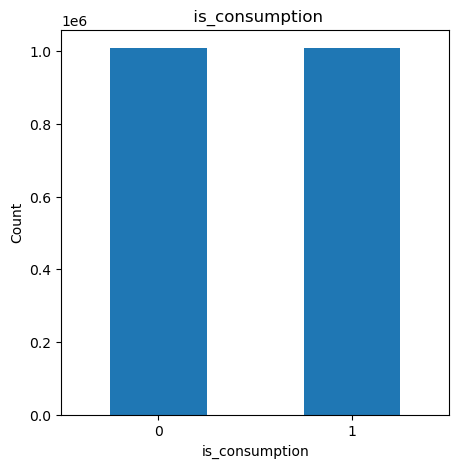


 Analysing Categorical Feature: ***county***
num of unique values: 16. The values are:
[0, 1, 2, 3, 4, ..., 11, 12, 13, 14, 15]
Length: 16
Categories (16, int64): [0, 1, 2, 3, ..., 12, 13, 14, 15]
num nulls: 0
data type is category


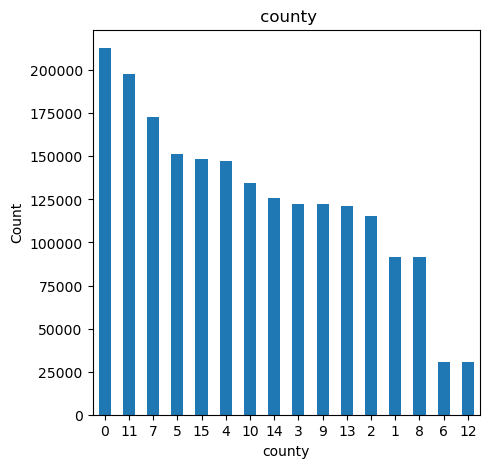


 Analysing Categorical Feature: ***product_type***
num of unique values: 4. The values are:
[1, 2, 3, 0]
Categories (4, int64): [0, 1, 2, 3]
num nulls: 0
data type is category


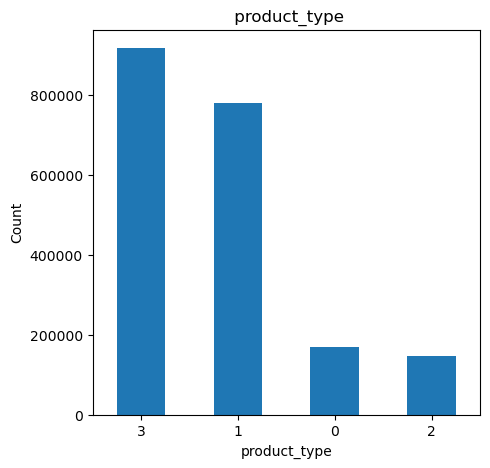


 Analysing Categorical Feature: ***is_business***
num of unique values: 2. The values are:
[0, 1]
Categories (2, int64): [0, 1]
num nulls: 0
data type is category


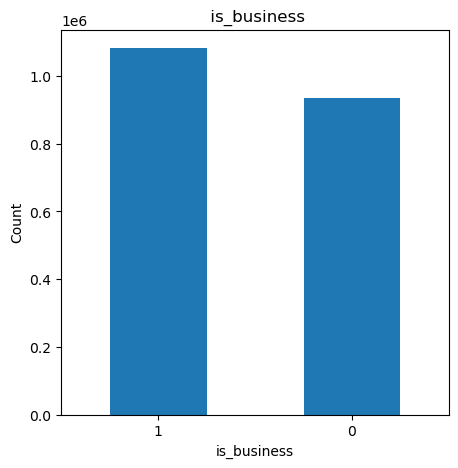


 Analysing Categorical Feature: ***category_1***
num of unique values: 138. The values are:
['0_0_1_0', '0_0_1_1', '0_0_2_0', '0_0_2_1', '0_0_3_0', ..., '4_1_1_1', '11_1_0_0', '11_1_0_1', '14_1_2_0', '14_1_2_1']
Length: 138
Categories (138, object): ['0_0_1_0', '0_0_1_1', '0_0_2_0', '0_0_2_1', ..., '9_1_1_0', '9_1_1_1', '9_1_3_0', '9_1_3_1']
num nulls: 0
data type is category


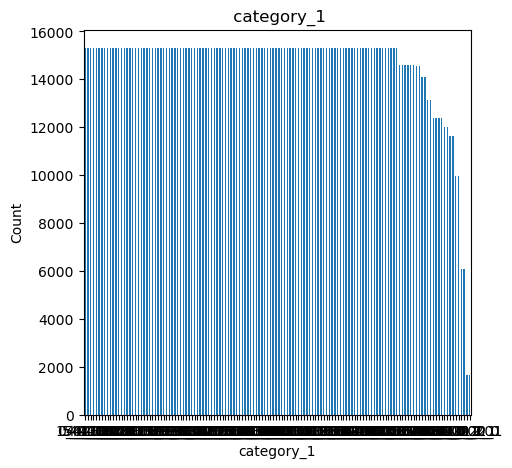

In [9]:
def analyse_categorical_feature(cols, df, title_prefix=""):
    for col in cols:
        print(f"\n Analysing Categorical Feature: ***{col}***")
        unique_vals = df[col].unique()
        print(f"num of unique values: {len(unique_vals)}. The values are:")
        print(unique_vals)
        num_nulls = df[col].isna().sum()
        print(f"num nulls: {num_nulls}")
        print(f"data type is {df[col].dtype}")
        if num_nulls > 0:
            print(f"Understanding Nulls:\n Here are some rows for which the column {col} got a NaN value")
            print(df[df[col].isna()].head(10))
        plt.figure(figsize=(5, 5))
        plt.title(title_prefix + " " + col)
        df[col].value_counts().plot(kind='bar', xlabel=col, ylabel='Count', rot=0)
        plt.show()
analyse_categorical_feature(categorical_cols, df_full)

Analysig categorical data for private prosumers

 Analysing Categorical Feature: ***product_type***
num of unique values: 3. The values are:
[1, 2, 3]
Categories (4, int64): [0, 1, 2, 3]
num nulls: 0
data type is category


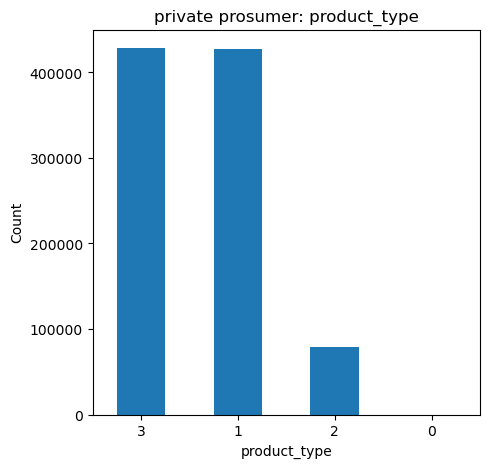


 Analysing Categorical Feature: ***county***
num of unique values: 14. The values are:
[0, 1, 2, 3, 4, ..., 10, 11, 13, 14, 15]
Length: 14
Categories (16, int64): [0, 1, 2, 3, ..., 12, 13, 14, 15]
num nulls: 0
data type is category


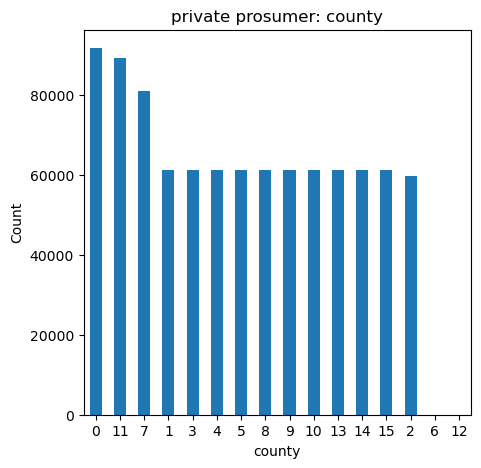


 Analysing Categorical Feature: ***is_consumption***
num of unique values: 2. The values are:
[0, 1]
Categories (2, int64): [0, 1]
num nulls: 0
data type is category


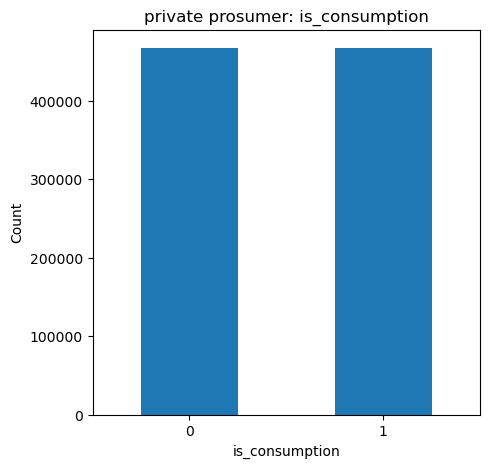

Analysig categorical data for business prosumers

 Analysing Categorical Feature: ***product_type***
num of unique values: 4. The values are:
[0, 1, 3, 2]
Categories (4, int64): [0, 1, 2, 3]
num nulls: 0
data type is category


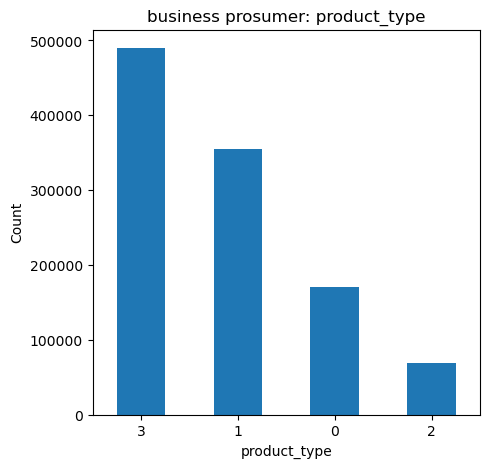


 Analysing Categorical Feature: ***county***
num of unique values: 16. The values are:
[0, 1, 2, 3, 4, ..., 11, 12, 13, 14, 15]
Length: 16
Categories (16, int64): [0, 1, 2, 3, ..., 12, 13, 14, 15]
num nulls: 0
data type is category


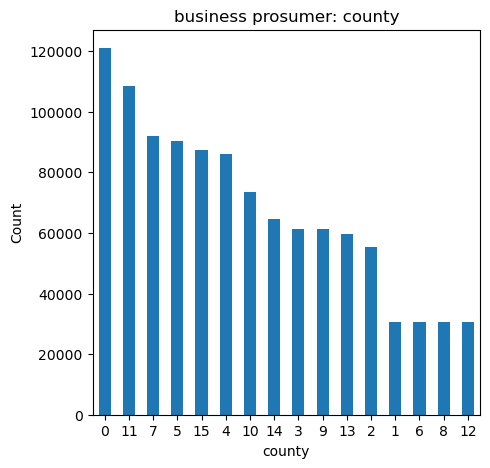


 Analysing Categorical Feature: ***is_consumption***
num of unique values: 2. The values are:
[0, 1]
Categories (2, int64): [0, 1]
num nulls: 0
data type is category


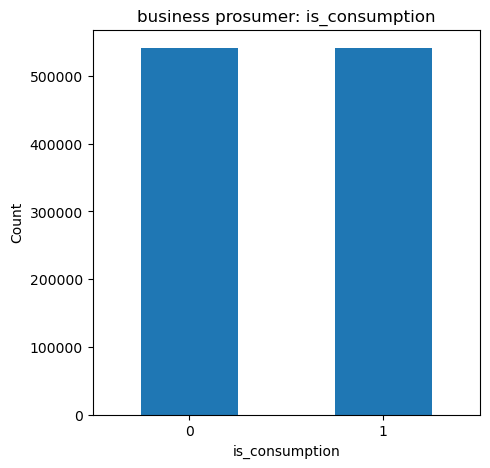

In [10]:
relevant_categorical_cols = categorical_cols - {'is_business', 'category_1'}
# Checking the data distribution for private clients in categorical columns
print("Analysig categorical data for private prosumers")
df_not_a_business = df_full[df_full['is_business'] == 0]
analyse_categorical_feature(relevant_categorical_cols, df_not_a_business, "private prosumer:")

# Analysing the data distribution for business clients in categorical columns
print("Analysig categorical data for business prosumers")
df_business = df_full[df_full['is_business'] == 1]
analyse_categorical_feature(relevant_categorical_cols, df_business, "business prosumer:")


**Conclusions**
* The data splits equaly between consumption and production of electricity
* There are slightly more Businesses than Private customers in the data (A bit of imbalance)
* There is one product type (0), and 2 counties (6,12) that are ONLY relevant for businesses, and not for private prosumers.

**Identifying trends in the target according to the category**

After identifying that the problem could be splitted into different problems (electricity consumption by individuals, electricity consumption by businesses, electricity production), it could be helpful to check what are the trends in any of those problems: Do they share any trends? Or are they completely different problems? For doing this initial analysis I used a [published notebook](https://www.kaggle.com/code/patrick0302/do-you-desire-sun-power) and expanded it.

In [11]:
train = pd.read_csv(f"{root}train.csv")

# Pivot the training data to have a cleaner DataFrame where we can analyze the mean target values
# organized by datetime and various categorical variables.
pivot_train = train.pivot_table(index='datetime',columns=['county','product_type','is_business','is_consumption'], values='target', aggfunc='mean')

# Renaming columns for easier access and interpretation
pivot_train.columns = ['county{}_productType{}_isBusiness{}_isConsumption{}'.format(*col) for col in pivot_train.columns.values]
pivot_train.index = pd.to_datetime(pivot_train.index)

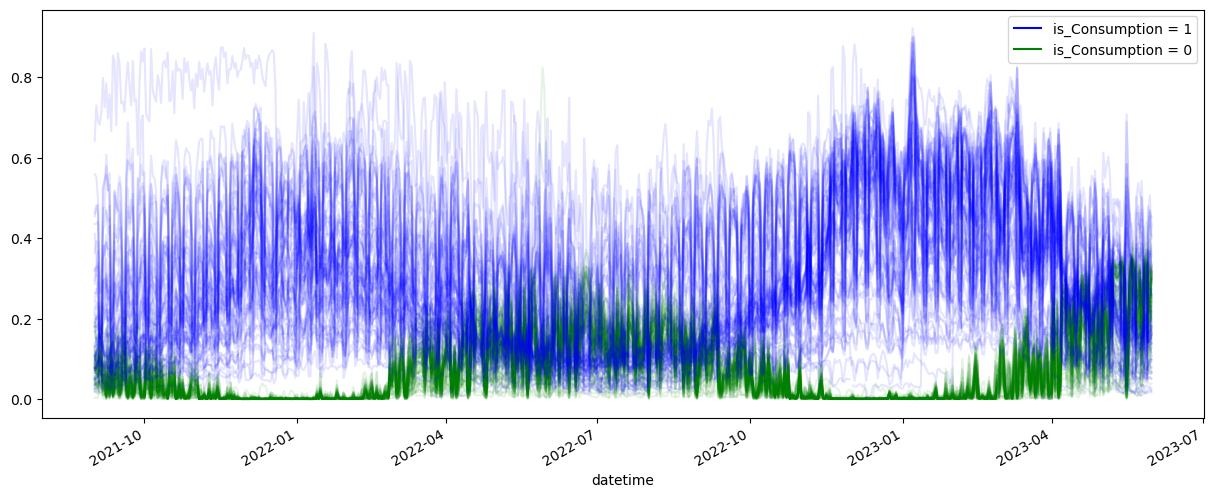

In [12]:
df_plot = pivot_train.copy()
# rescale for simplicity of the plot
df_plot = (df_plot - df_plot.min())/(df_plot.max() - df_plot.min())

# Resampling and calculating the mean per day ('D')
df_plot_resampled_D = df_plot.resample('D').mean()

# Select the relevant columns and time range
columns_consumption_0 = df_plot_resampled_D.columns[df_plot_resampled_D.columns.str.contains('isConsumption0')]
columns_consumption_1 = df_plot_resampled_D.columns[df_plot_resampled_D.columns.str.contains('isConsumption1')]

# Create a single legend for each category
plt.figure(figsize=(15, 6))
plt.plot([], color='blue', label='is_Consumption = 1')
plt.plot([], color='green', label='is_Consumption = 0')
plt.legend()

# Plot the data for is_Consumption = 0 in green
for column in columns_consumption_0:
    df_plot_resampled_D.loc['2021-9':, column].plot(alpha=0.1, color='green', legend=False)

# Plot the data for is_Consumption = 1 in blue
for column in columns_consumption_1:
    df_plot_resampled_D.loc['2021-9':, column].plot(alpha=0.1, color='blue', legend=False)



# Show the plot
plt.show()

Conclusions that will impact the pre-processing and pipeline:
1. **Consumption and production patterns and behaviours completely differ from one another:** 
These are two separated problems, and their trends look completely different. Moreover, *their scale is different* (nowhere in the graph does the electricity production reaches the scale of winter energy consumption). Therefore, there is no point in scaling the production patterns together with the consumption patterns - these shoud be separated before scaled.
2. Up until January 2022, there are some consumption patterns that are not allinged with the rest of the data, and may create confusions. If slicing some of the data, **it is better to take data from Janury 2022 and later on.**
3. During the winter months, there is barely any production of electricity, while the consumption peaks. On the other hand, during the winter moths the production increases and the consumption decreases. This is another motivation to split those tasks into two different models, as they are inherintly different.



**Examine consumption**
I wrote to following code to plot the consumption patterns for the business and private segments. The plot begins on January 2022, and is aggregared to daily granularity.

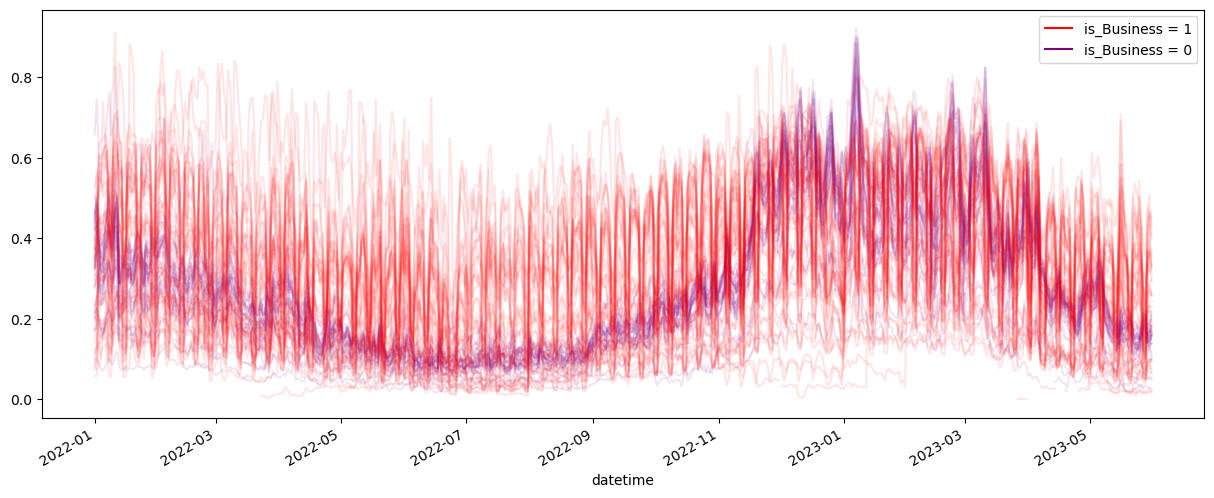

In [13]:

consumption_pivot_resampled_D = df_plot_resampled_D[columns_consumption_1]
# Select the relevant columns
private_consumption = consumption_pivot_resampled_D.columns[consumption_pivot_resampled_D.columns.str.contains('isBusiness0')]
business_consumption = consumption_pivot_resampled_D.columns[consumption_pivot_resampled_D.columns.str.contains('isBusiness1')]

# Create a single legend for each category
plt.figure(figsize=(15, 6))
plt.plot([], color='red', label='is_Business = 1')
plt.plot([], color='purple', label='is_Business = 0')
plt.legend()

# Plot the data for private consumption (isBusiness==0) purple
for column in private_consumption:
    consumption_pivot_resampled_D.loc['2022-1':, column].plot(alpha=0.1, color='purple', legend=False)

# Plot the data for business consumption (isBusiness==1) red
for column in business_consumption:
    consumption_pivot_resampled_D.loc['2022-1':, column].plot(alpha=0.1, color='red', legend=False)

# Add a single legend to the plot
#plt.legend()

# Show the plot
plt.show()


**Conclusions**
1. Business consumption and private consumption have similar general trends, and similar range of values, as we can see that both purple and red are visible on both the top numbers of the plot and the bottom. Therefore, it does make sense to scale those values together 
2. During the summer, spring and fall the consumption of electricity is much lower in the private sector than in the business sector. On the winter months (Late november to early April), the consumption levels become similar

**Further analysis of trends in electricity consumption** 

To identify trends in higher resolution, I plotted the segmented consumption of shorter period of time: April-May 2023

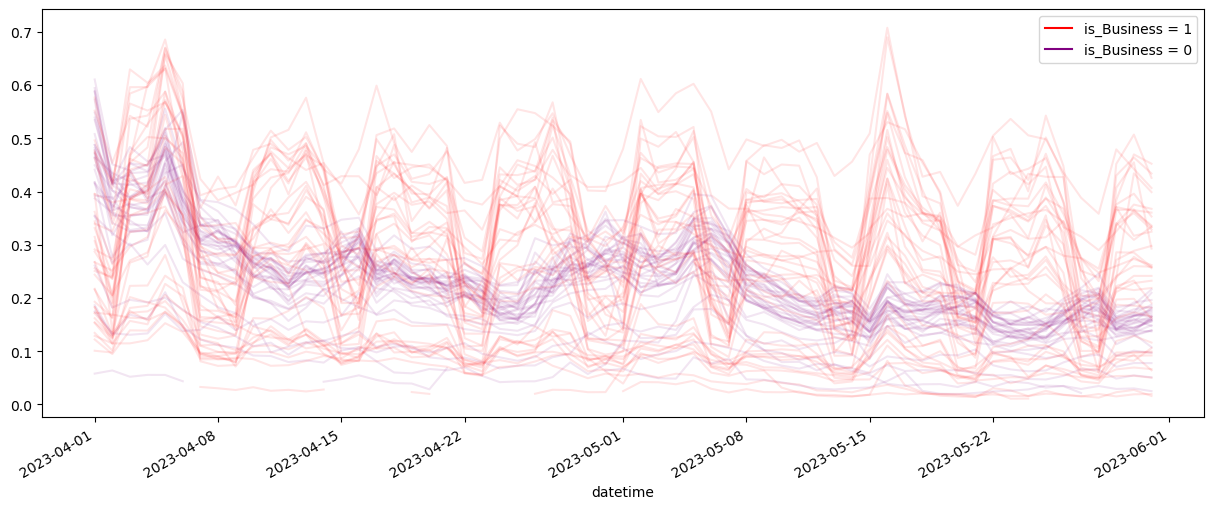

In [14]:
# Create a single legend for each category
plt.figure(figsize=(15, 6))
plt.plot([], color='red', label='is_Business = 1')
plt.plot([], color='purple', label='is_Business = 0')
plt.legend()

# Plot the data for private consumption (isBusiness==0) purple
for column in private_consumption:
    consumption_pivot_resampled_D.loc['2023-4':, column].plot(alpha=0.1, color='purple', legend=False)

# Plot the data for business consumption (isBusiness==1) red
for column in business_consumption:
    consumption_pivot_resampled_D.loc['2023-4':, column].plot(alpha=0.1, color='red', legend=False)

# Show the plot
plt.show()

**Conculsion**

Business electricity consumption is much more flanctuated and influenced by the day of the week: We can see the red graphs are significally decreasing every 7 days, and those low peaks are correlated with weekend days. For example, the first full low peak is during 8-9.4.2023, which is a weekend in Estonia (Saturday-Sunday). Similarly, every week this reoccures - 15-16.4.2023, 22-23.4.2023 and so on.
On the other hand, we can see that private consumption is less impacted by the day of the week, and shows less of those peaks.

**This finding drives me into adding a new feature to the dataframe, that indicates whether the date is a weekend or not (is_weekend).**

**Analyse production patterns**

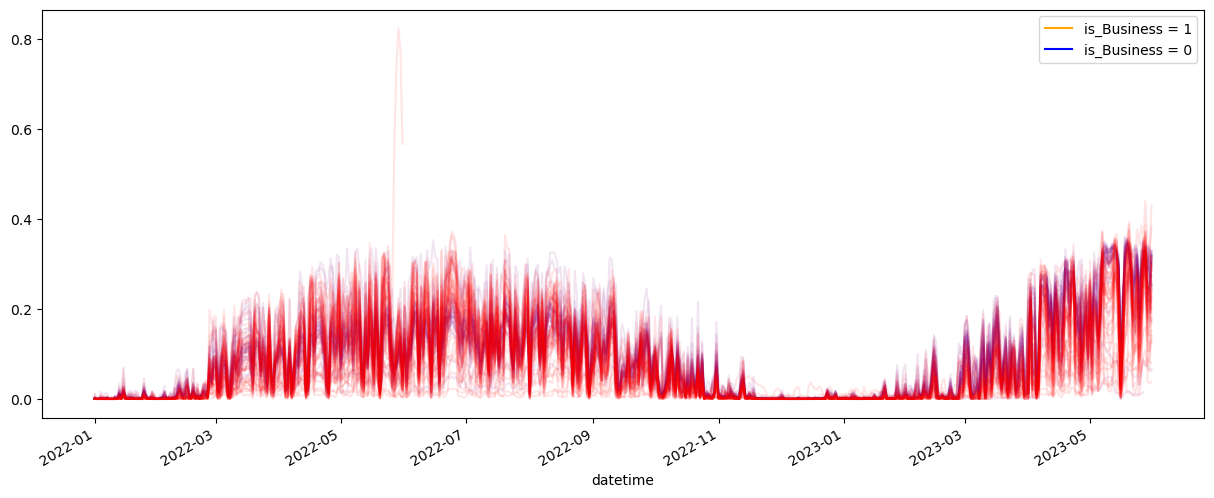

In [15]:
production_pivot_resampled_D = df_plot_resampled_D[columns_consumption_0]
# Select the relevant columns
private_production = production_pivot_resampled_D.columns[production_pivot_resampled_D.columns.str.contains('isBusiness0')]
business_production = production_pivot_resampled_D.columns[production_pivot_resampled_D.columns.str.contains('isBusiness1')]

# Create a single legend for each category
plt.figure(figsize=(15, 6))
plt.plot([], color='orange', label='is_Business = 1')
plt.plot([], color='blue', label='is_Business = 0')
plt.legend()

# Plot the data for private consumption (isBusiness==0) purple
for column in private_production:
    production_pivot_resampled_D.loc['2022-1':, column].plot(alpha=0.1, color='purple', legend=False)

# Plot the data for business consumption (isBusiness==1) red
for column in business_production:
    production_pivot_resampled_D.loc['2022-1':, column].plot(alpha=0.1, color='red', legend=False)

# Add a single legend to the plot
#plt.legend()

# Show the plot
plt.show()

**Conlcusions**
1. We can see that in the production case, it doesn't matter whether this is a business or a private person. This is not surprising, as the solar panels are expected to behave the same regardless if they are installed for a prosumer or a consumer. 

2. What is visible in this plot and wasn't visible in the previous one, is **how important it is to split the data to consumption vs production *before* scaling.** We can see that the entire data is squeezed between 0 and less than 0.4, due to a very small line over 0.8. If we use min-max norm after removing outliers, the data should be more evenly splitted

**Examine hourly behaviour**

Keeping in mind that the goal of this project is to predict the HOURLY production/consumption of electricity, it is important to examine not only the daily behavior of each, but also the hourly behaviour.

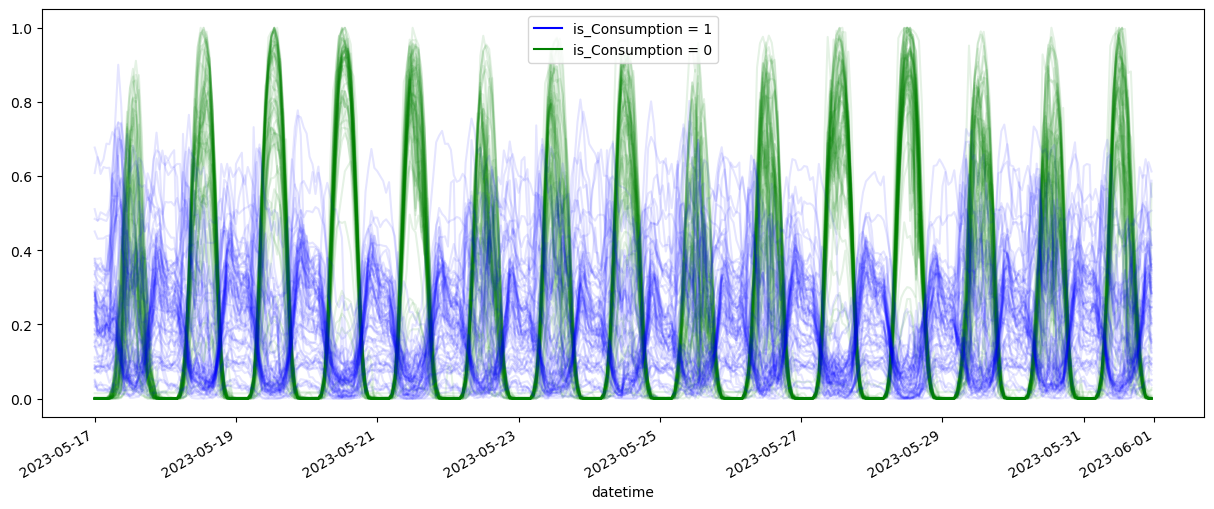

In [16]:
df_plot = pivot_train.copy()
df_plot = (df_plot - df_plot.min())/(df_plot.max() - df_plot.min())

# Select the relevant columns and time range
columns_consumption_0 = df_plot.columns[df_plot.columns.str.contains('isConsumption0')]
columns_consumption_1 = df_plot.columns[df_plot.columns.str.contains('isConsumption1')]

# Create a single legend for each category
plt.figure(figsize=(15, 6))
plt.plot([], color='blue', label='is_Consumption = 1')
plt.plot([], color='green', label='is_Consumption = 0')
plt.legend()

# Plot the data for is_Consumption = 0 in green
for column in columns_consumption_0:
    df_plot.loc['2023-5-17':, column].plot(alpha=0.1, color='green', legend=False)

# Plot the data for is_Consumption = 1 in blue
for column in columns_consumption_1:
    df_plot.loc['2023-5-17':, column].plot(alpha=0.1, color='blue', legend=False)



# Show the plot
plt.show()

**Conclusion**
* Once again we can observe an exacly opposite trends between hourly consumption and production of electricity. This could be explained by the fact that electricity production with solar panels is only possible at night, so every day there are hours when no electricity is produced by any prosumer. On the other hand, during night the tempratures are lower which means more people might need to heat their houses.

**Electricity consumption in hours granularity**
Lets examine the how hourly consumption changes between different types of consumers

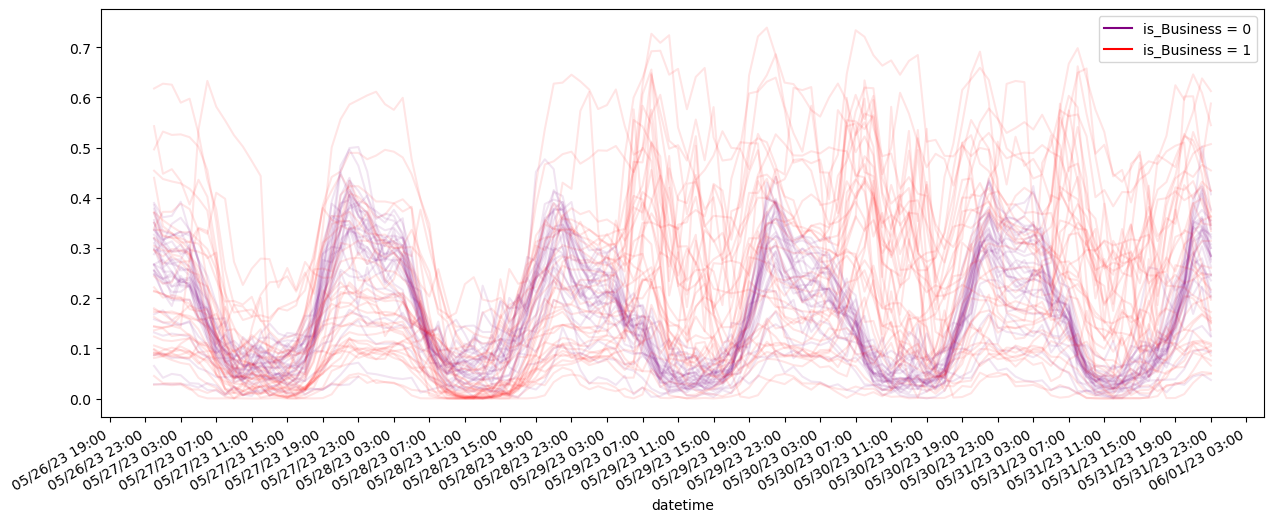

In [17]:
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates


consumption_plot = df_plot[columns_consumption_1]

# Select the relevant columns and time range
private = consumption_plot.columns[consumption_plot.columns.str.contains('isBusiness0')]
business = consumption_plot.columns[consumption_plot.columns.str.contains('isBusiness1')]

# Create a single legend for each category
plt.figure(figsize=(15, 6))
plt.plot([], color='purple', label='is_Business = 0')
plt.plot([], color='red', label='is_Business = 1')
plt.legend()


# Plot the data for is_Consumption = 0 in green
for column in private:
    consumption_plot.loc['2023-5-27':, column].plot(alpha=0.1, color='purple', legend=False)

# Plot the data for is_Consumption = 1 in blue
for column in business:
    consumption_plot.loc['2023-5-27':, column].plot(alpha=0.1, color='red', legend=False)

# Set the x-axis ticks every 3 hours
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))

# Set the x-axis format to show hours and minutes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D %H:00'))

# Set the x-axis ticks
# plt.xticks(consumption_plot.loc['2023-05-29':].index, rotation=45, ha='right')


# Show the plot
plt.show()

**Conclusion**
* We can see that in the case of private prosumers, there is minimal consumption of electricity during the day. During the night time, there is much more consumption of electricity. This seems to hold both during the weekend (In this case, May 27-28) and during the working days. As the model will be able to figure out itself the exact trends, it is more important for me to find out if the categories differ from each other enough to be worth creating a different dataset and model.

After finding out which types of columns are in the dataset, analyse their distribution to find potential problems

In [18]:
# histogram plot
def plot_histograms_with_percentiles(cols, df, df_name=None):
    if df_name:
        print(f"Analyse colomns for df: {df_name}")
        
    for col in cols:
        print(f"Analizing column: ***{col}***")
        print(f"data type of column: {df[col].dtypes}")
        zeros_count = (df[col] == 0).sum()
        nulls_count = (df[col].isna()).sum()
        min_val = df[col].min()
        max_val = df[col].max()
        mean = df[col].mean()
        std = df[col].std()
        print(f"num zeros: {zeros_count} | num_nulls: {nulls_count}")
        print(f"minimum: {min_val} | maximum: {max_val} | mean: {mean} | std: {std}")
        plt.figure(figsize=(8, 5))
        plt.hist(df[col], bins=30, color='blue', edgecolor='black', linewidth=1.5)
        plt.title(col)

        # Print out tuples for each range with the number of values
        counts, bin_edges, _ = plt.hist(df[col], bins=30, color='tab:cyan', edgecolor='black', linewidth=1.5)
        bin_size = (bin_edges[-1] - bin_edges[0]) / 30
        ranges = [(round(bin_edges[i], 2), round(bin_edges[i+1], 2)) for i in range(len(bin_edges)-1)]

        # Annotate each bar with the count of values in the bin
        for count, bin_edge in zip(counts, bin_edges):
            plt.text(bin_edge + bin_size / 2, count, f'{int(count)}', ha='center', va='bottom', fontsize=6, color='black')

        # Get the 99th and 1st percentile values
        percentile_99 = df[col].quantile(0.99)
        percentile_01 = df[col].quantile(0.01)

        # Annotate the plot with the 99th and 1st percentile values
        plt.axvline(percentile_99, color='red', linestyle='dashed', linewidth=1, label='99th Percentile')
        plt.axvline(percentile_01, color='red', linestyle='dashed', linewidth=1, label='1th Percentile')

        plt.show()



72
['lowest_price_per_mwh', 'highest_price_per_mwh', 'eic_count', 'installed_capacity', 'euros_per_mwh', 'hours_ahead', 'temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low', 'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component', '10_metre_v_wind_component', 'direct_solar_radiation', 'surface_solar_radiation_downwards', 'snowfall', 'total_precipitation', 'hours_ahead_forcast_local', 'temperature_forcast_local', 'dewpoint_forcast_local', 'cloudcover_high_forcast_local', 'cloudcover_low_forcast_local', 'cloudcover_mid_forcast_local', 'cloudcover_total_forcast_local', '10_metre_u_wind_component_forcast_local', '10_metre_v_wind_component_forcast_local', 'direct_solar_radiation_forcast_local', 'surface_solar_radiation_downwards_forcast_local', 'snowfall_forcast_local', 'total_precipitation_forcast_local', 'temperature_historical_date', 'dewpoint_historical_date', 'rain', 'snowfall_historical_date', 'surface_pressure', 'cloudcover_total_historical_date', 'cloudcover_low_

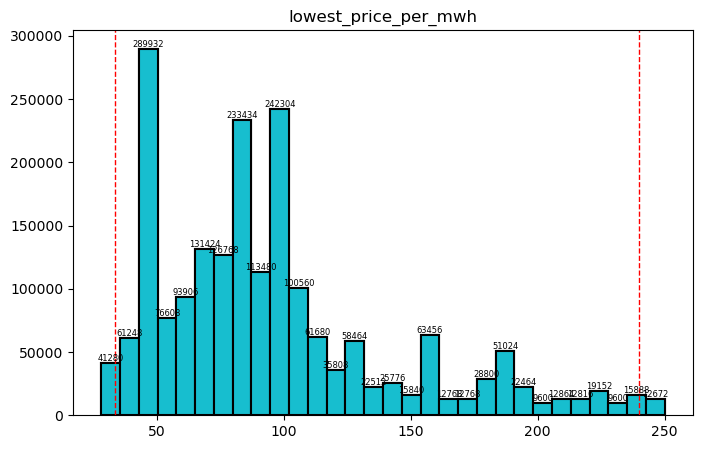

Analizing column: ***highest_price_per_mwh***
data type of column: float32
num zeros: 0 | num_nulls: 2928
minimum: 34.0 | maximum: 305.0 | mean: 108.31099700927734 | std: 54.7870979309082


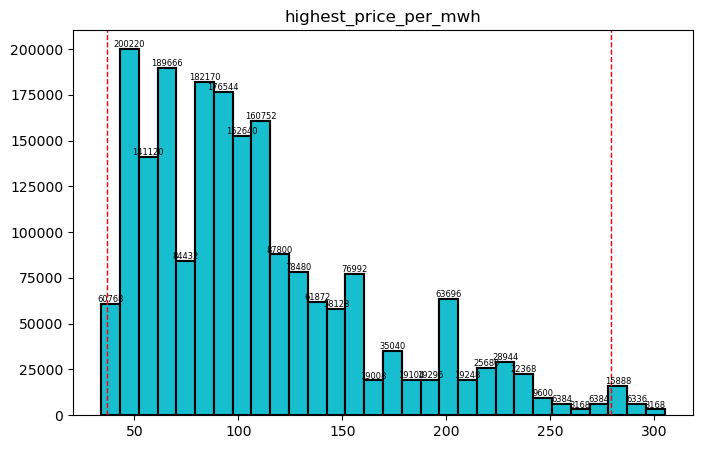

Analizing column: ***eic_count***
data type of column: float64
num zeros: 0 | num_nulls: 8640
minimum: 5.0 | maximum: 1517.0 | mean: 73.42646766050296 | std: 144.1306166868224


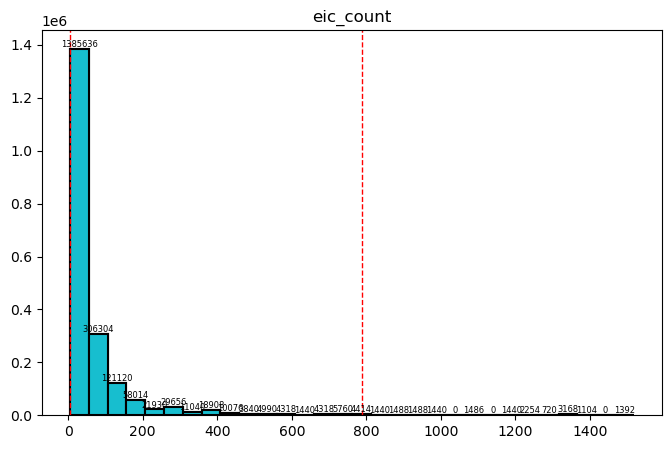

Analizing column: ***installed_capacity***
data type of column: float32
num zeros: 0 | num_nulls: 8640
minimum: 6.0 | maximum: 19314.310546875 | mean: 1452.3487548828125 | std: 2422.8984375


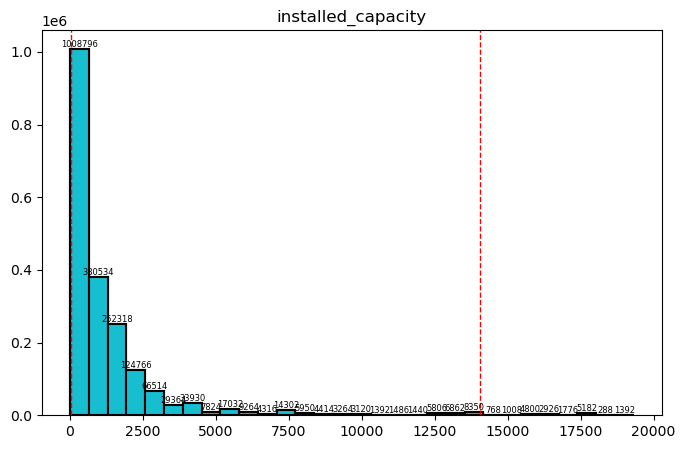

Analizing column: ***euros_per_mwh***
data type of column: float32
num zeros: 928 | num_nulls: 3196
minimum: -10.0600004196167 | maximum: 4000.0 | mean: 157.460693359375 | std: 121.26612854003906


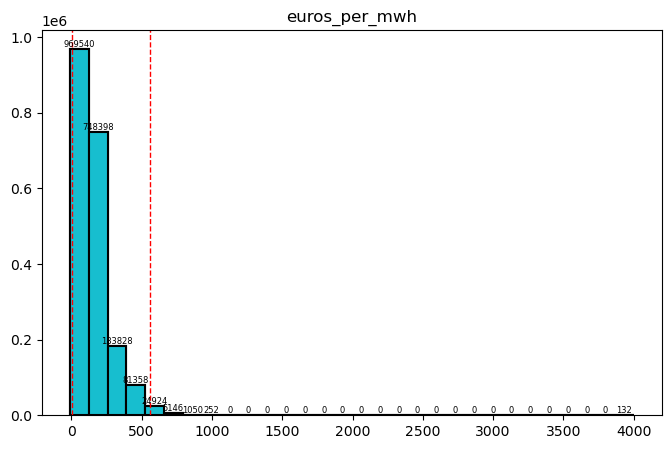

Analizing column: ***hours_ahead***
data type of column: float32
num zeros: 0 | num_nulls: 366
minimum: 1.0 | maximum: 45.0 | mean: 24.49974822998047 | std: 6.976203918457031


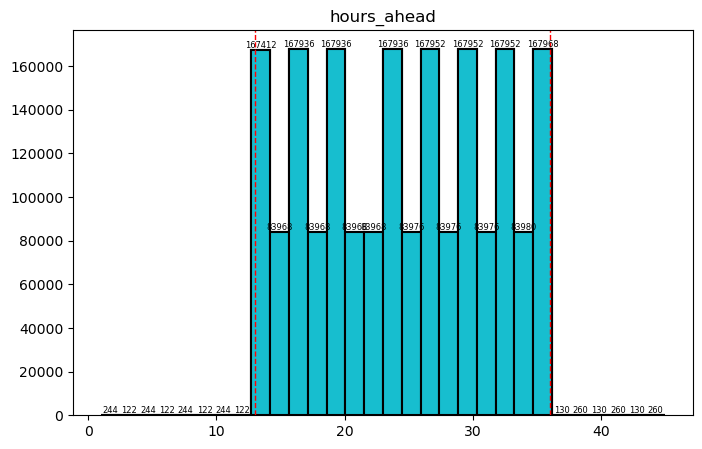

Analizing column: ***temperature***
data type of column: float32
num zeros: 0 | num_nulls: 366
minimum: -14.44072151184082 | maximum: 26.833044052124023 | mean: 5.7551774978637695 | std: 7.536080837249756


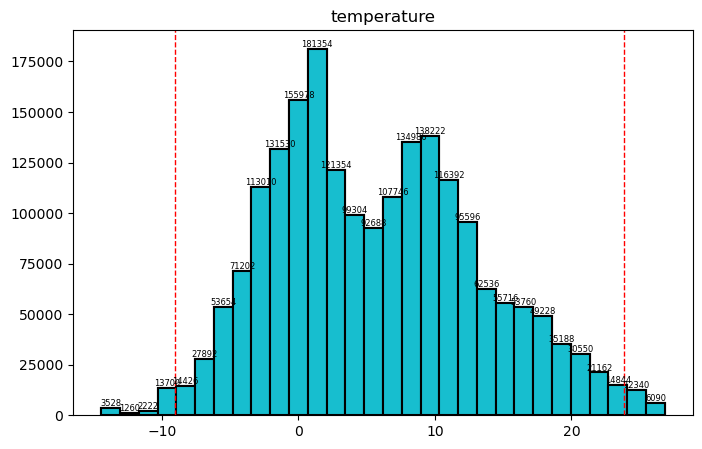

Analizing column: ***dewpoint***
data type of column: float32
num zeros: 0 | num_nulls: 366
minimum: -16.940664291381836 | maximum: 18.842153549194336 | mean: 2.416835308074951 | std: 6.85148811340332


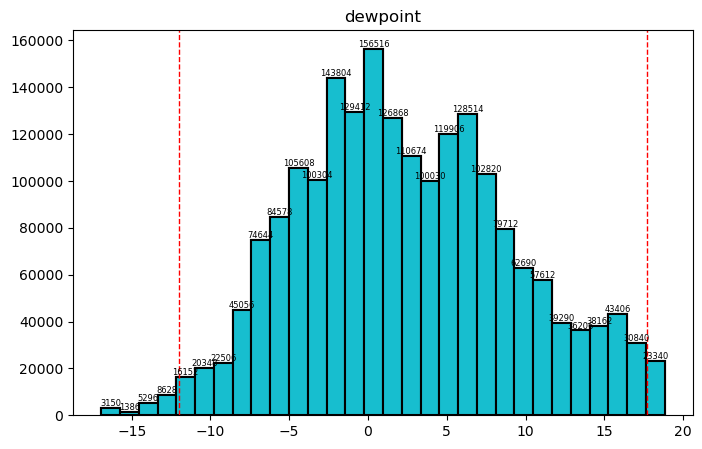

Analizing column: ***cloudcover_high***
data type of column: float32
num zeros: 102992 | num_nulls: 366
minimum: 0.0 | maximum: 1.0 | mean: 0.3944112956523895 | std: 0.329601526260376


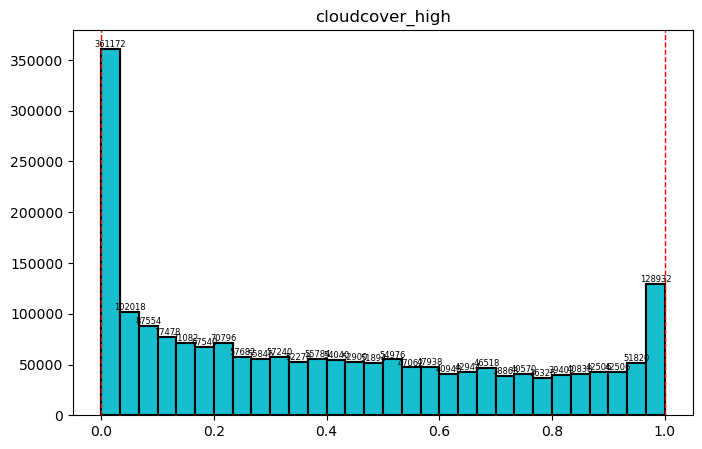

Analizing column: ***cloudcover_low***
data type of column: float32
num zeros: 18220 | num_nulls: 366
minimum: 0.0 | maximum: 1.0000020265579224 | mean: 0.4336825907230377 | std: 0.3501354157924652


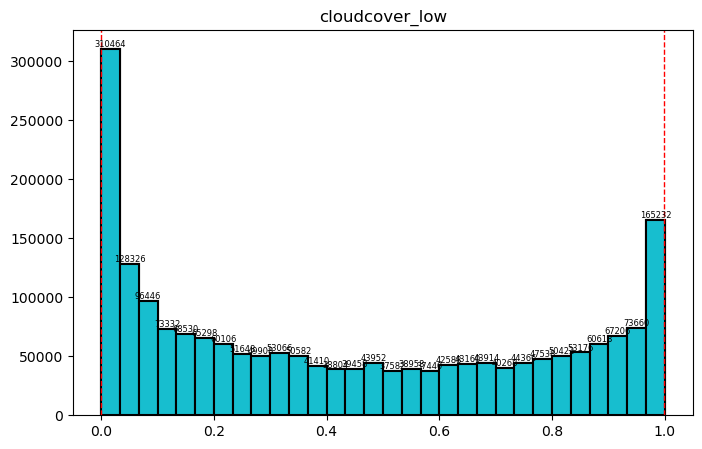

Analizing column: ***cloudcover_mid***
data type of column: float32
num zeros: 63296 | num_nulls: 366
minimum: 0.0 | maximum: 1.0000004768371582 | mean: 0.3589869439601898 | std: 0.3119557201862335


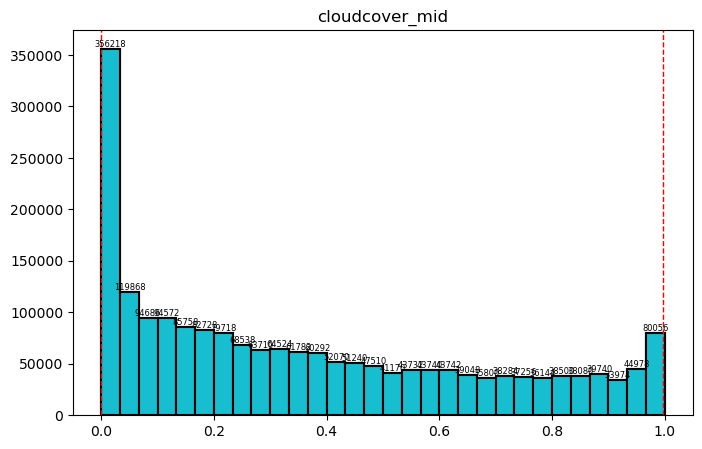

Analizing column: ***cloudcover_total***
data type of column: float32
num zeros: 2648 | num_nulls: 366
minimum: 0.0 | maximum: 1.0000044107437134 | mean: 0.6811872124671936 | std: 0.3039337992668152


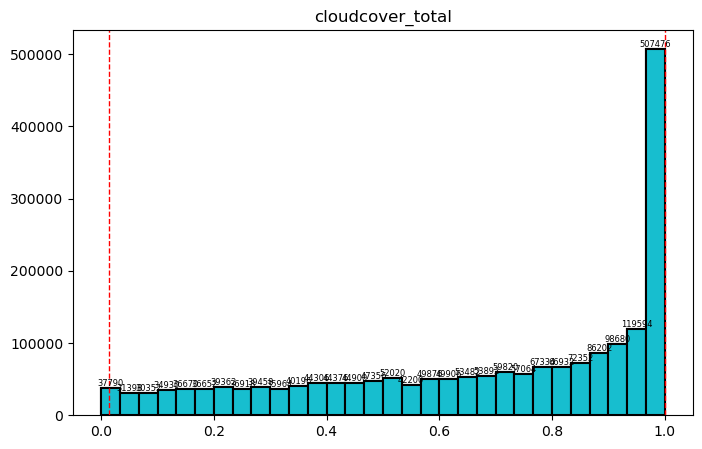

Analizing column: ***10_metre_u_wind_component***
data type of column: float32
num zeros: 0 | num_nulls: 366
minimum: -8.658795356750488 | maximum: 11.93663501739502 | mean: 1.256993293762207 | std: 3.500415086746216


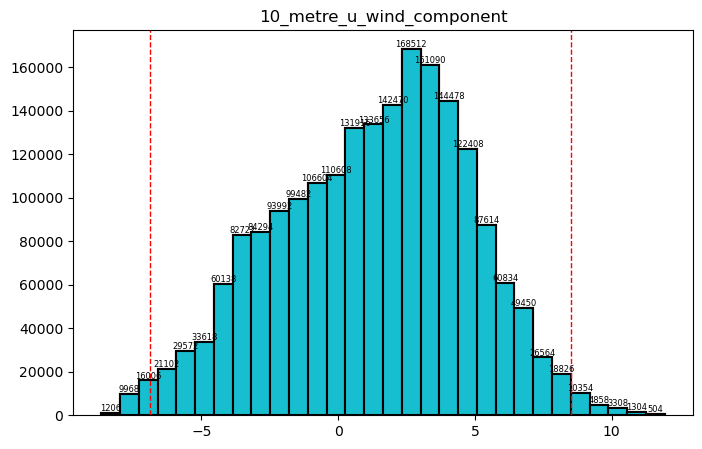

Analizing column: ***10_metre_v_wind_component***
data type of column: float32
num zeros: 0 | num_nulls: 366
minimum: -12.247291564941406 | maximum: 11.132244110107422 | mean: 0.7244841456413269 | std: 3.685214042663574


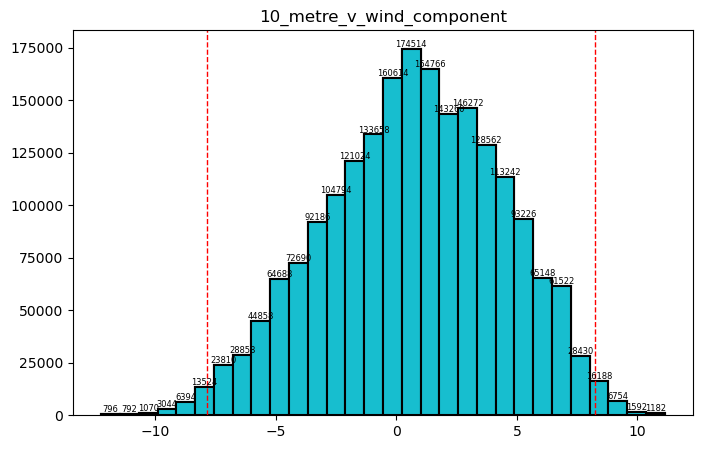

Analizing column: ***direct_solar_radiation***
data type of column: float32
num zeros: 859772 | num_nulls: 366
minimum: -0.03462301567196846 | maximum: 884.03857421875 | mean: 152.0920867919922 | std: 234.73651123046875


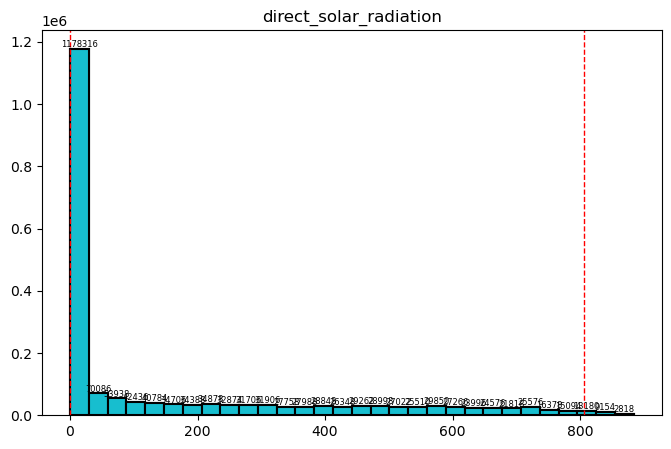

Analizing column: ***surface_solar_radiation_downwards***
data type of column: float32
num zeros: 851910 | num_nulls: 366
minimum: -0.018015872687101364 | maximum: 798.9674682617188 | mean: 111.51605987548828 | std: 182.63758850097656


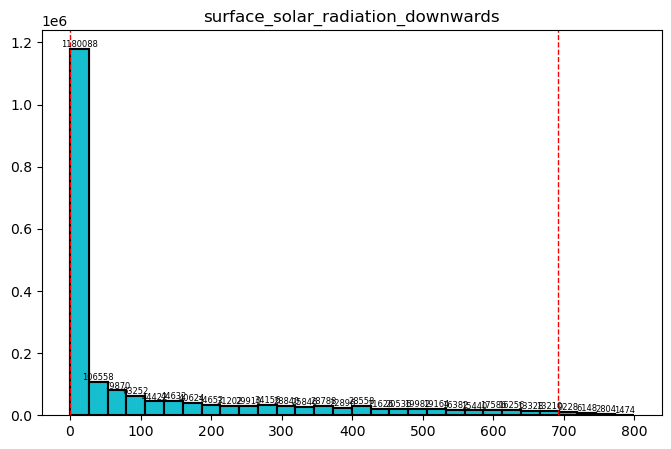

Analizing column: ***snowfall***
data type of column: float32
num zeros: 1095270 | num_nulls: 366
minimum: -6.652304307408485e-08 | maximum: 0.001244646031409502 | mean: 2.5341483706142753e-05 | std: 7.52769410610199e-05


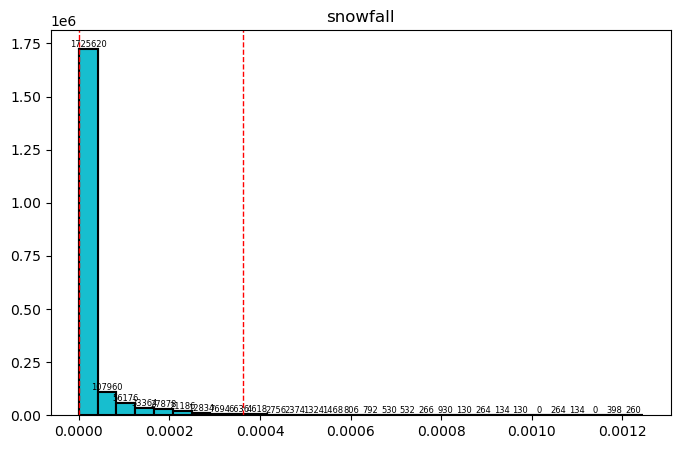

Analizing column: ***total_precipitation***
data type of column: float32
num zeros: 212900 | num_nulls: 366
minimum: -1.4585675671696663e-06 | maximum: 0.0015383744612336159 | mean: 7.846426160540432e-05 | std: 0.00014230645319912583


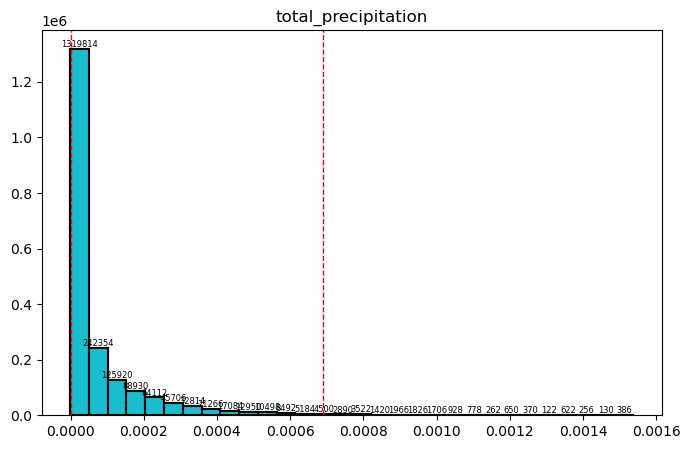

Analizing column: ***hours_ahead_forcast_local***
data type of column: float32
num zeros: 0 | num_nulls: 30976
minimum: 1.0 | maximum: 45.0 | mean: 24.499786376953125 | std: 6.975864887237549


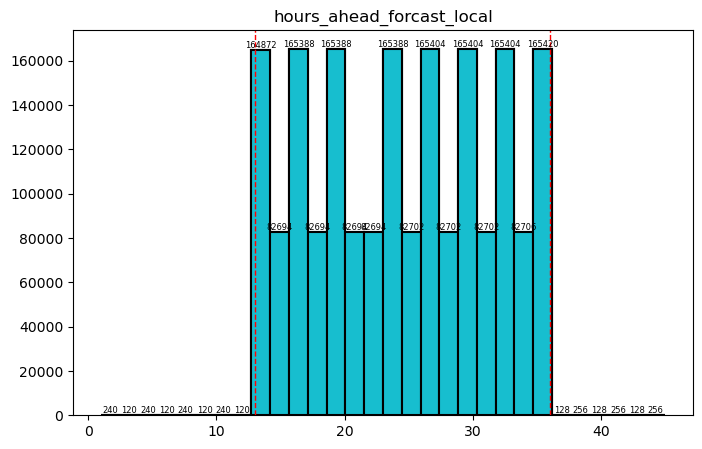

Analizing column: ***temperature_forcast_local***
data type of column: float32
num zeros: 0 | num_nulls: 30976
minimum: -23.578250885009766 | maximum: 31.282861709594727 | mean: 5.324807643890381 | std: 8.389385223388672


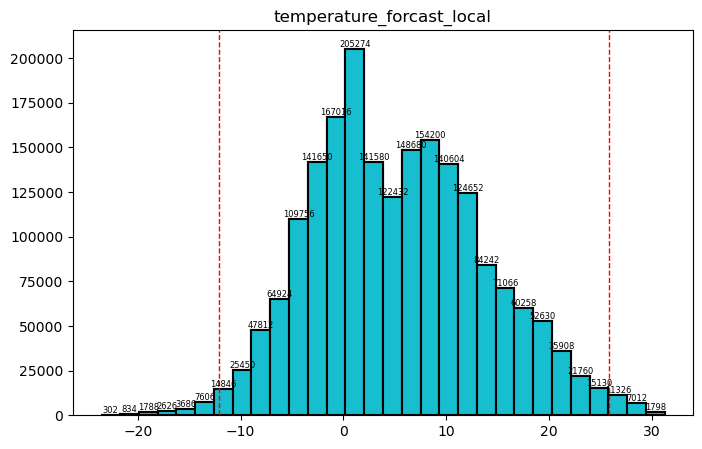

Analizing column: ***dewpoint_forcast_local***
data type of column: float32
num zeros: 0 | num_nulls: 30976
minimum: -25.808439254760742 | maximum: 20.870019912719727 | mean: 1.7955923080444336 | std: 7.31950044631958


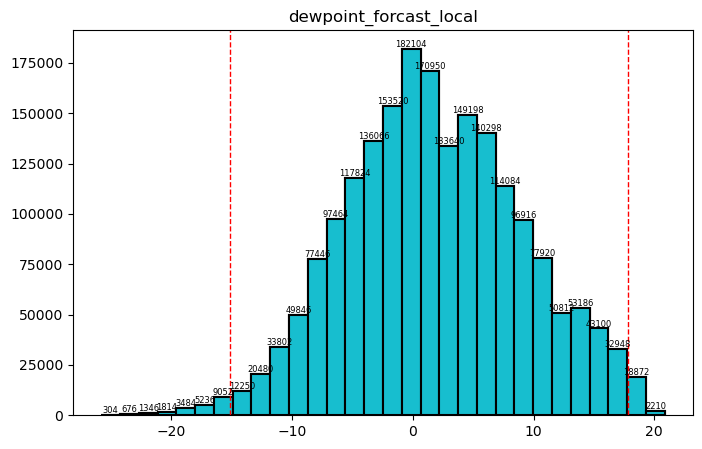

Analizing column: ***cloudcover_high_forcast_local***
data type of column: float32
num zeros: 540594 | num_nulls: 30976
minimum: 0.0 | maximum: 1.000007152557373 | mean: 0.3965859115123749 | std: 0.4036954641342163


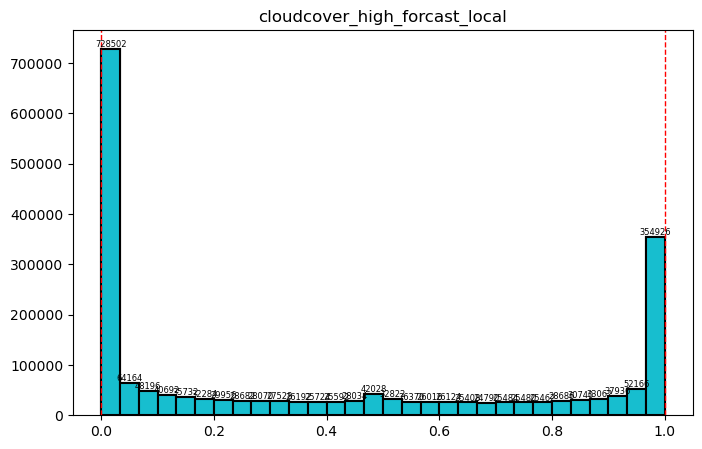

Analizing column: ***cloudcover_low_forcast_local***
data type of column: float32
num zeros: 243516 | num_nulls: 30976
minimum: 0.0 | maximum: 1.0000075101852417 | mean: 0.4537387788295746 | std: 0.41074711084365845


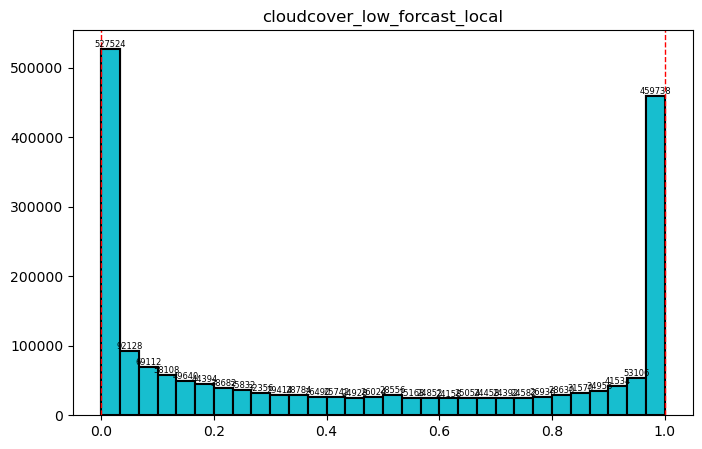

Analizing column: ***cloudcover_mid_forcast_local***
data type of column: float32
num zeros: 356394 | num_nulls: 30976
minimum: 0.0 | maximum: 1.000006914138794 | mean: 0.3680627942085266 | std: 0.38464778661727905


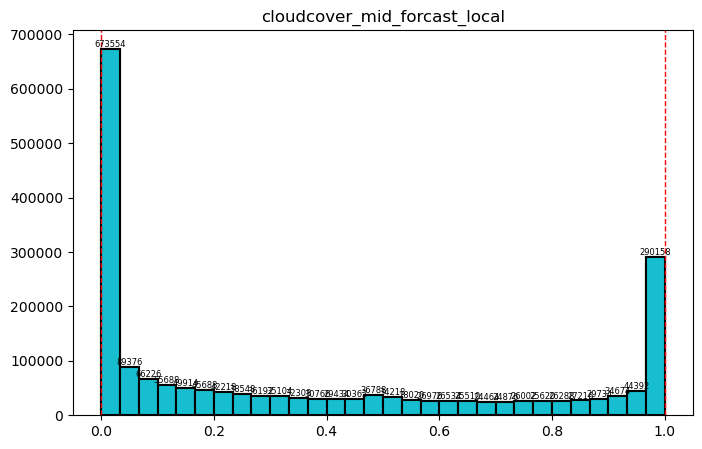

Analizing column: ***cloudcover_total_forcast_local***
data type of column: float32
num zeros: 58612 | num_nulls: 30976
minimum: 0.0 | maximum: 1.0000073909759521 | mean: 0.6951955556869507 | std: 0.3618096113204956


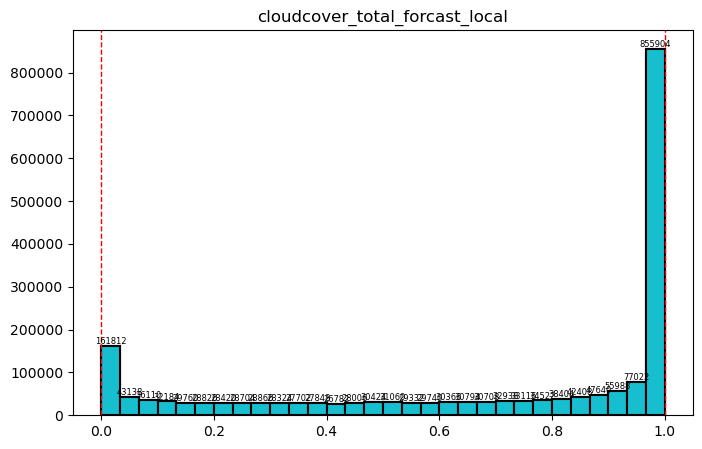

Analizing column: ***10_metre_u_wind_component_forcast_local***
data type of column: float32
num zeros: 0 | num_nulls: 30976
minimum: -9.58829116821289 | maximum: 13.059645652770996 | mean: 1.0199886560440063 | std: 2.939490556716919


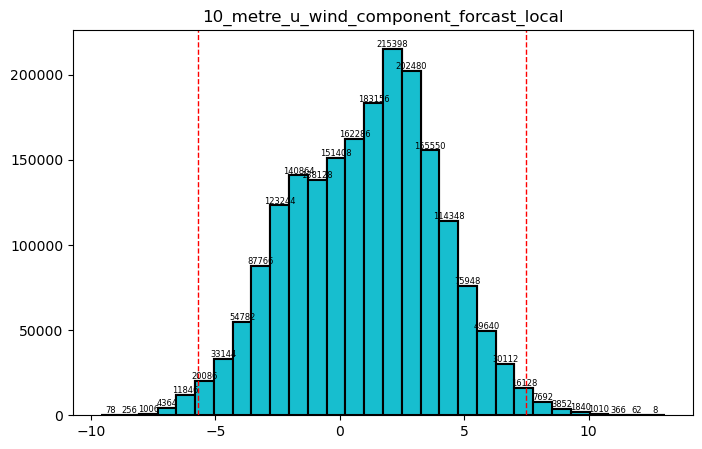

Analizing column: ***10_metre_v_wind_component_forcast_local***
data type of column: float32
num zeros: 0 | num_nulls: 30976
minimum: -14.274986267089844 | maximum: 12.251590728759766 | mean: 0.7096046805381775 | std: 3.0988707542419434


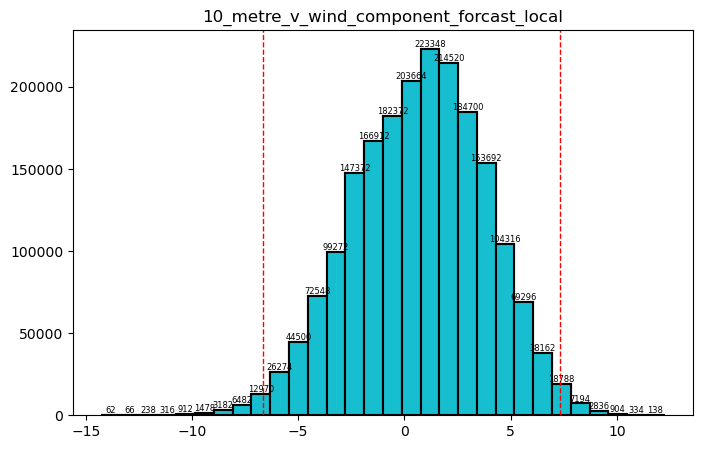

Analizing column: ***direct_solar_radiation_forcast_local***
data type of column: float32
num zeros: 919468 | num_nulls: 30976
minimum: -0.41902777552604675 | maximum: 914.0691528320312 | mean: 144.3848114013672 | std: 242.63572692871094


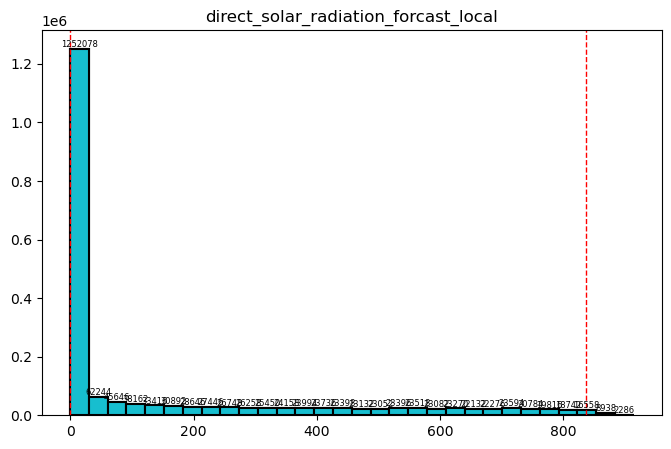

Analizing column: ***surface_solar_radiation_downwards_forcast_local***
data type of column: float32
num zeros: 873496 | num_nulls: 30976
minimum: -0.19305555522441864 | maximum: 828.96923828125 | mean: 108.87611389160156 | std: 182.25782775878906


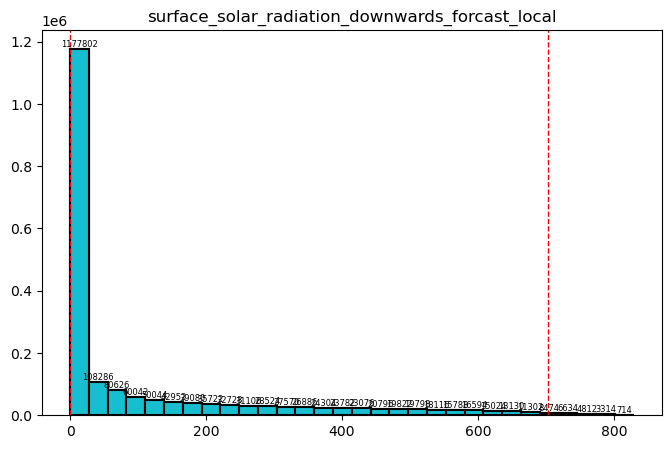

Analizing column: ***snowfall_forcast_local***
data type of column: float32
num zeros: 1351674 | num_nulls: 30976
minimum: -1.773238182067871e-06 | maximum: 0.002708107465878129 | mean: 2.646036045916844e-05 | std: 0.00010855559230549261


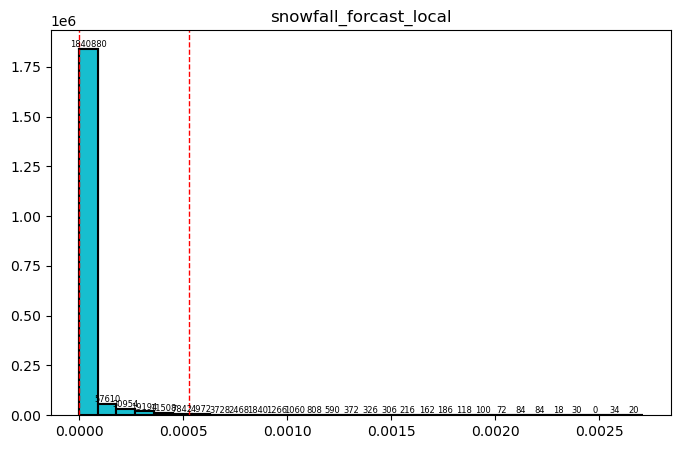

Analizing column: ***total_precipitation_forcast_local***
data type of column: float32
num zeros: 673388 | num_nulls: 30976
minimum: -7.599592208862305e-06 | maximum: 0.009637594223022461 | mean: 7.837270823074505e-05 | std: 0.00022109280689619482


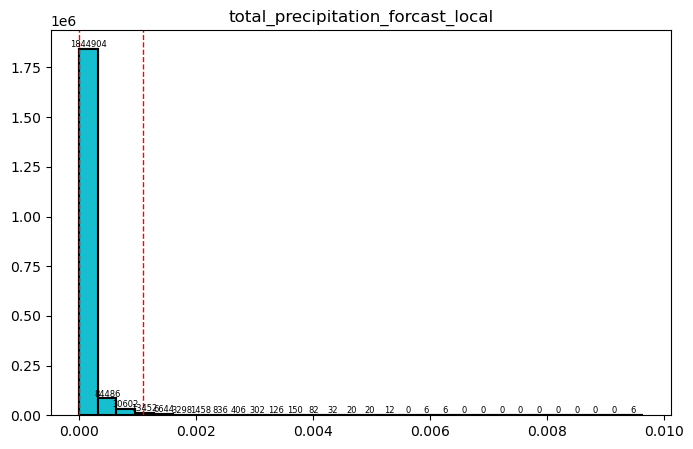

Analizing column: ***temperature_historical_date***
data type of column: float32
num zeros: 0 | num_nulls: 4514
minimum: -14.283928871154785 | maximum: 27.27857208251953 | mean: 5.741233825683594 | std: 7.629238605499268


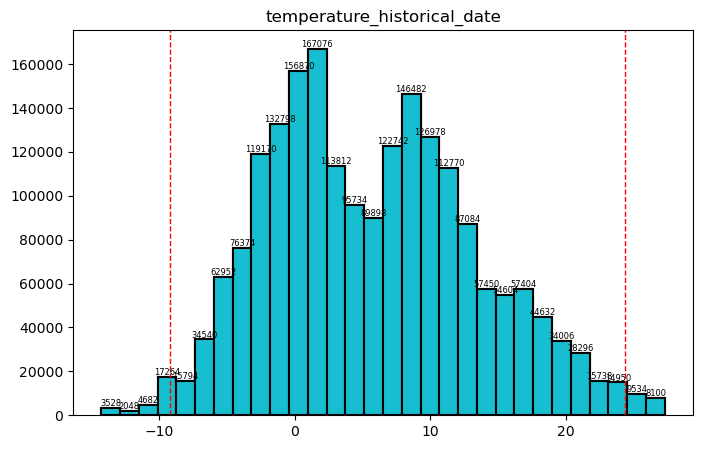

Analizing column: ***dewpoint_historical_date***
data type of column: float32
num zeros: 0 | num_nulls: 4514
minimum: -17.22142791748047 | maximum: 19.20892906188965 | mean: 2.236598014831543 | std: 6.834613800048828


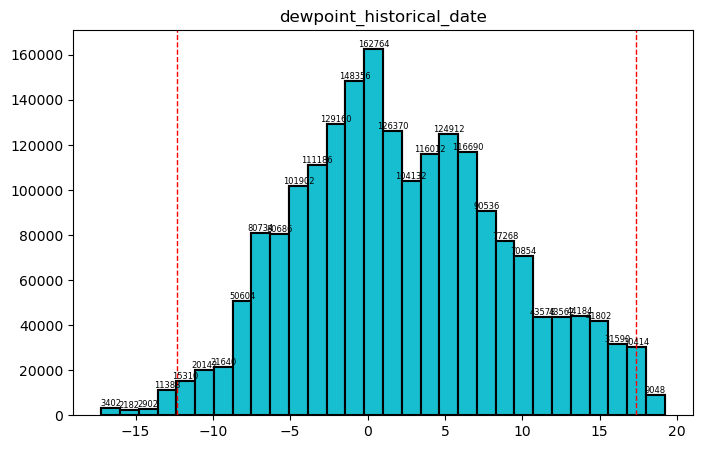

Analizing column: ***rain***
data type of column: float32
num zeros: 616746 | num_nulls: 4514
minimum: 0.0 | maximum: 1.4955357313156128 | mean: 0.049553096294403076 | std: 0.11676481366157532


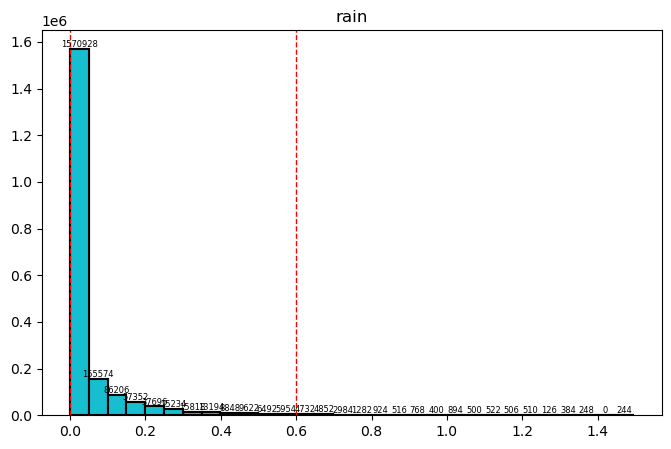

Analizing column: ***snowfall_historical_date***
data type of column: float32
num zeros: 1303282 | num_nulls: 4514
minimum: 0.0 | maximum: 0.8987500071525574 | mean: 0.01606753282248974 | std: 0.05123498663306236


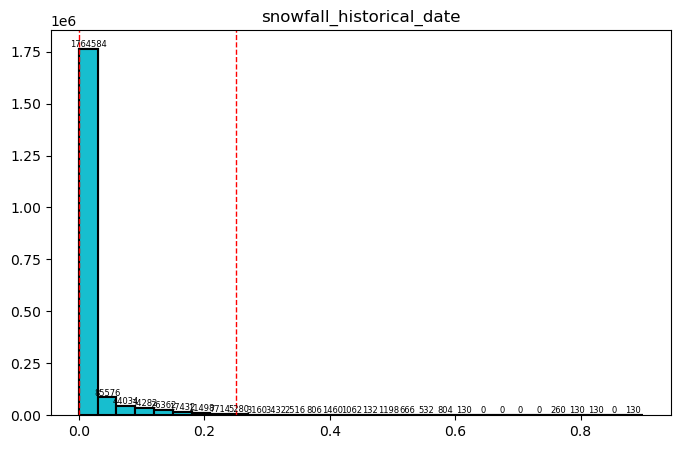

Analizing column: ***surface_pressure***
data type of column: float32
num zeros: 0 | num_nulls: 4514
minimum: 960.0 | maximum: 1043.2847900390625 | mean: 1009.2970581054688 | std: 15.027481079101562


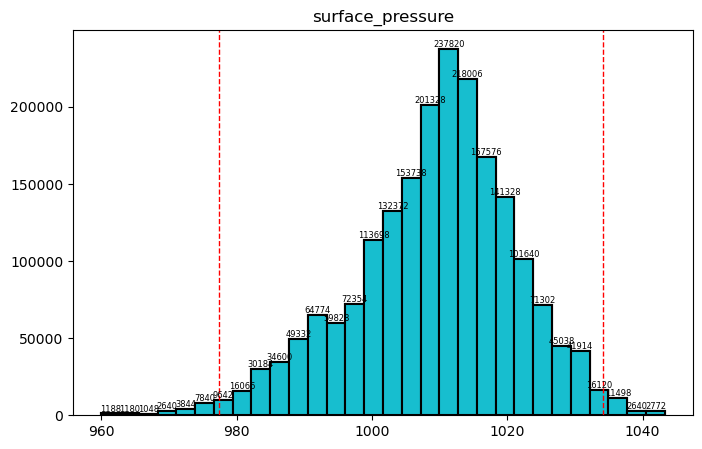

Analizing column: ***cloudcover_total_historical_date***
data type of column: float32
num zeros: 2312 | num_nulls: 4514
minimum: 0.0 | maximum: 100.0 | mean: 60.8477668762207 | std: 31.24842071533203


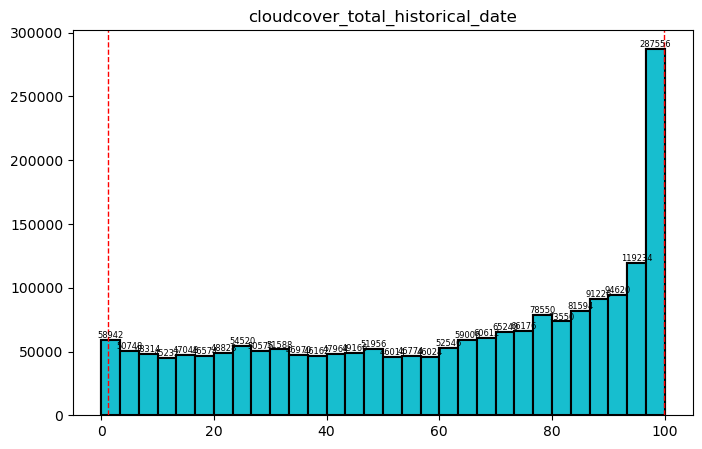

Analizing column: ***cloudcover_low_historical_date***
data type of column: float32
num zeros: 14044 | num_nulls: 4514
minimum: 0.0 | maximum: 100.0 | mean: 46.60625076293945 | std: 33.71687316894531


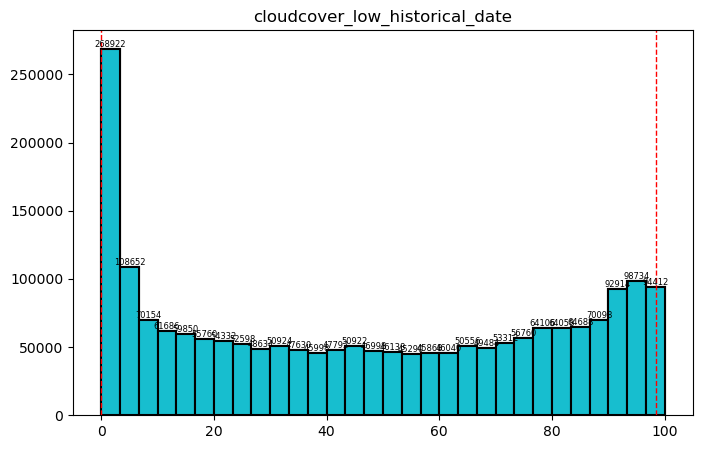

Analizing column: ***cloudcover_mid_historical_date***
data type of column: float32
num zeros: 24720 | num_nulls: 4514
minimum: 0.0 | maximum: 99.96428680419922 | mean: 34.410701751708984 | std: 29.63800048828125


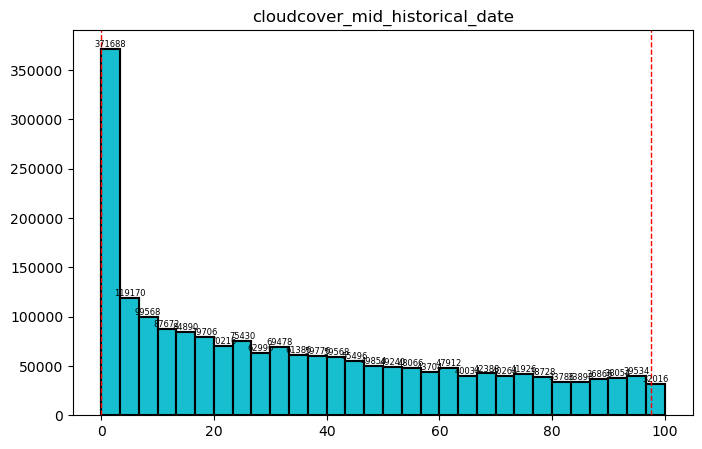

Analizing column: ***cloudcover_high_historical_date***
data type of column: float32
num zeros: 67548 | num_nulls: 4514
minimum: 0.0 | maximum: 100.0 | mean: 36.05558395385742 | std: 32.084922790527344


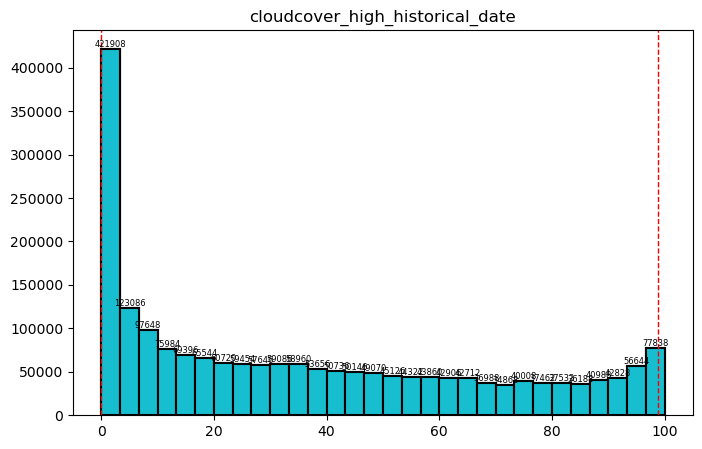

Analizing column: ***windspeed_10m***
data type of column: float32
num zeros: 0 | num_nulls: 4514
minimum: 1.0917658805847168 | maximum: 12.023313522338867 | mean: 4.842931270599365 | std: 1.8483242988586426


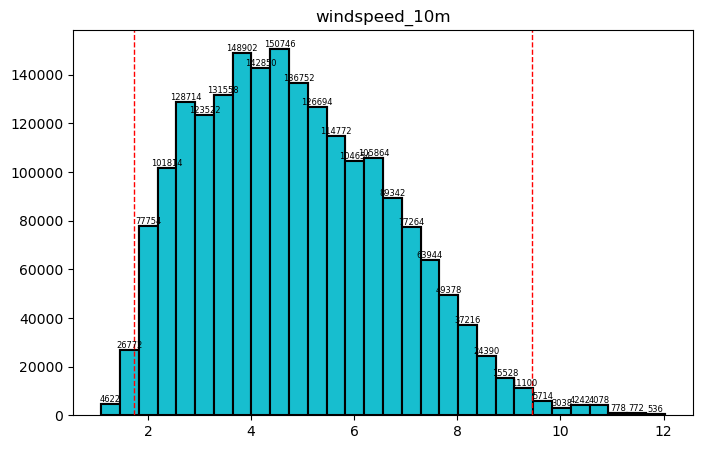

Analizing column: ***winddirection_10m***
data type of column: float32
num zeros: 0 | num_nulls: 4514
minimum: 15.598214149475098 | maximum: 356.3035583496094 | mean: 197.8180389404297 | std: 72.19247436523438


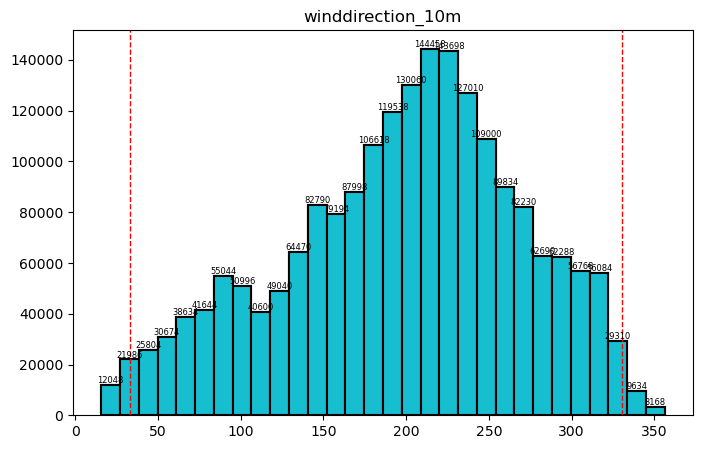

Analizing column: ***shortwave_radiation***
data type of column: float32
num zeros: 329486 | num_nulls: 4514
minimum: 0.0 | maximum: 780.9732055664062 | mean: 106.93035888671875 | std: 172.49510192871094


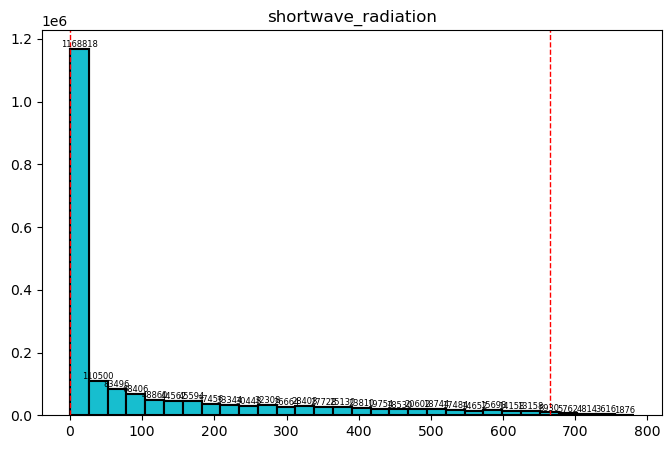

Analizing column: ***direct_solar_radiation_historical_date***
data type of column: float32
num zeros: 432900 | num_nulls: 4514
minimum: 0.0 | maximum: 670.4642944335938 | mean: 64.79981231689453 | std: 123.14634704589844


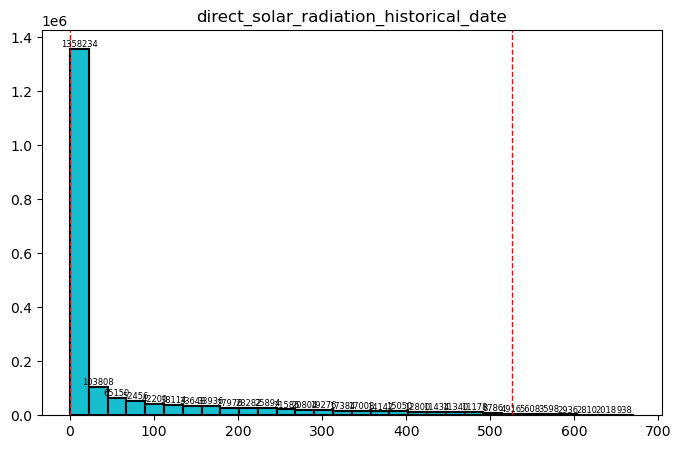

Analizing column: ***diffuse_radiation***
data type of column: float32
num zeros: 329486 | num_nulls: 4514
minimum: 0.0 | maximum: 286.6785583496094 | mean: 42.1306037902832 | std: 58.05531311035156


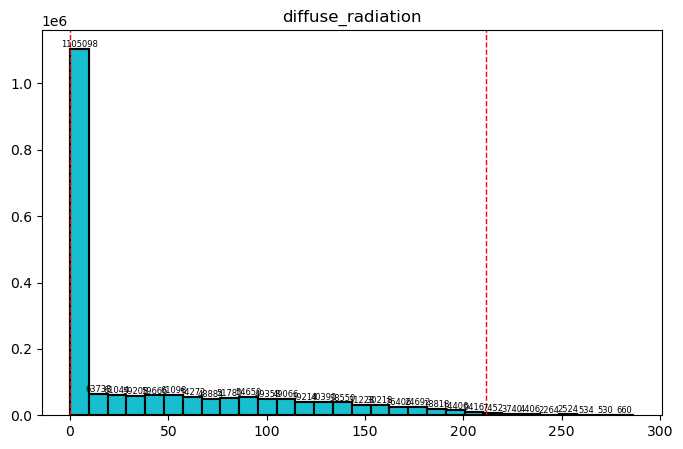

Analizing column: ***temperature_historical_local***
data type of column: float32
num zeros: 2822 | num_nulls: 35056
minimum: -22.799999237060547 | maximum: 30.799999237060547 | mean: 5.323573589324951 | std: 8.39220142364502


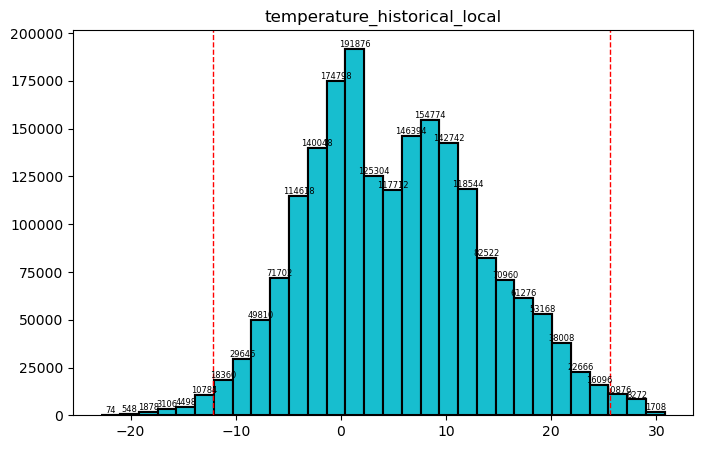

Analizing column: ***dewpoint_historical_local***
data type of column: float32
num zeros: 3774 | num_nulls: 35056
minimum: -25.200000762939453 | maximum: 21.100000381469727 | mean: 1.7345099449157715 | std: 7.350552558898926


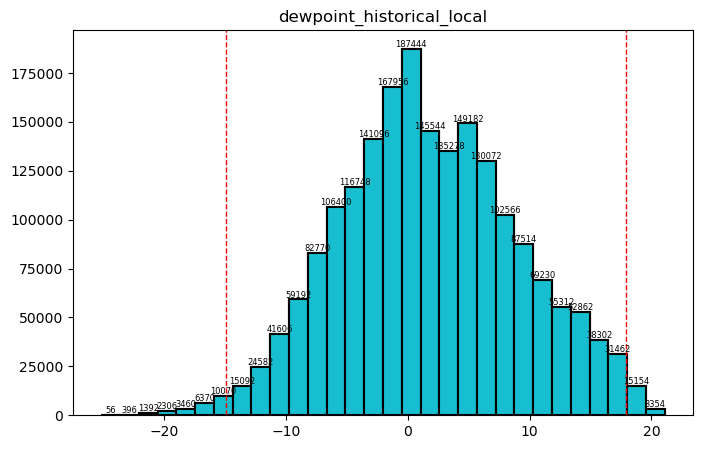

Analizing column: ***rain_historical_local***
data type of column: float32
num zeros: 1598530 | num_nulls: 35056
minimum: 0.0 | maximum: 6.199999809265137 | mean: 0.04657996818423271 | std: 0.18139773607254028


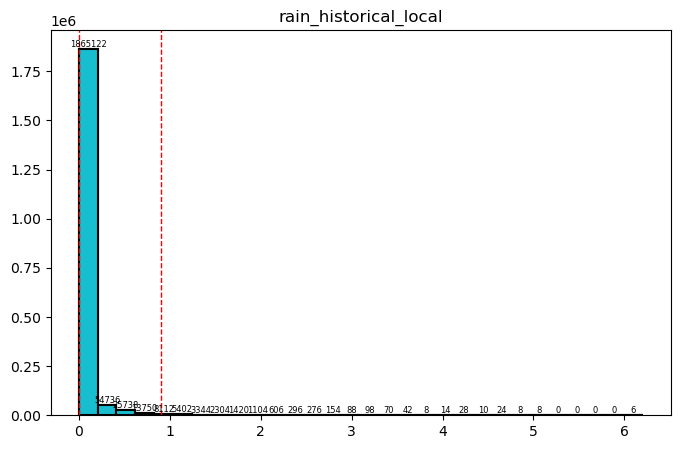

Analizing column: ***snowfall_historical_local***
data type of column: float32
num zeros: 1755010 | num_nulls: 35056
minimum: 0.0 | maximum: 2.240000009536743 | mean: 0.016773812472820282 | std: 0.07347007095813751


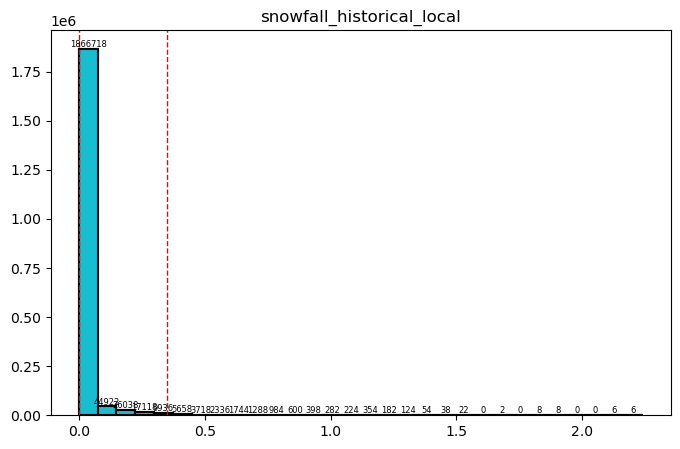

Analizing column: ***surface_pressure_historical_local***
data type of column: float32
num zeros: 0 | num_nulls: 35056
minimum: 950.47998046875 | maximum: 1048.5999755859375 | mean: 1006.8045654296875 | std: 16.466352462768555


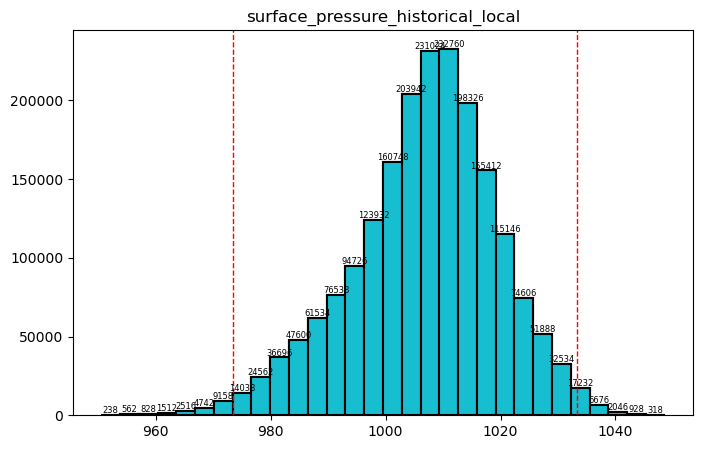

Analizing column: ***cloudcover_total_historical_local***
data type of column: float32
num zeros: 80972 | num_nulls: 35056
minimum: 0.0 | maximum: 100.0 | mean: 62.4202995300293 | std: 36.76054000854492


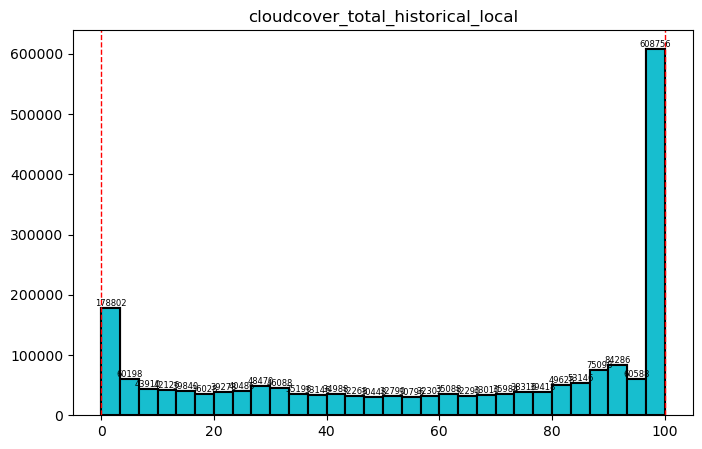

Analizing column: ***cloudcover_low_historical_local***
data type of column: float32
num zeros: 289112 | num_nulls: 35056
minimum: 0.0 | maximum: 100.0 | mean: 48.39643096923828 | std: 39.99534606933594


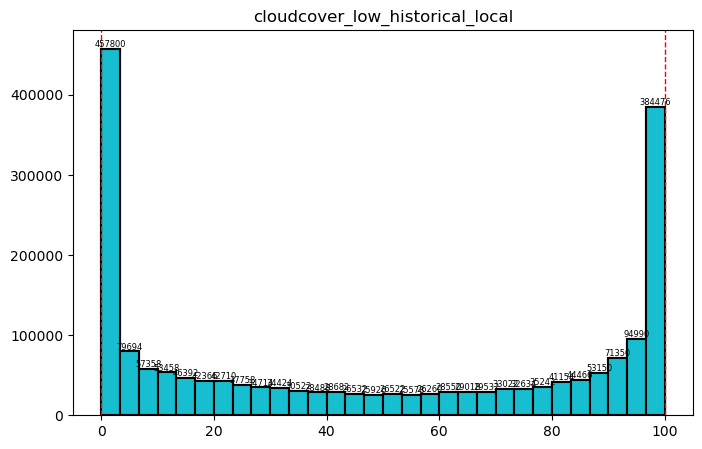

Analizing column: ***cloudcover_mid_historical_local***
data type of column: float32
num zeros: 516700 | num_nulls: 35056
minimum: 0.0 | maximum: 100.0 | mean: 35.20082473754883 | std: 37.568721771240234


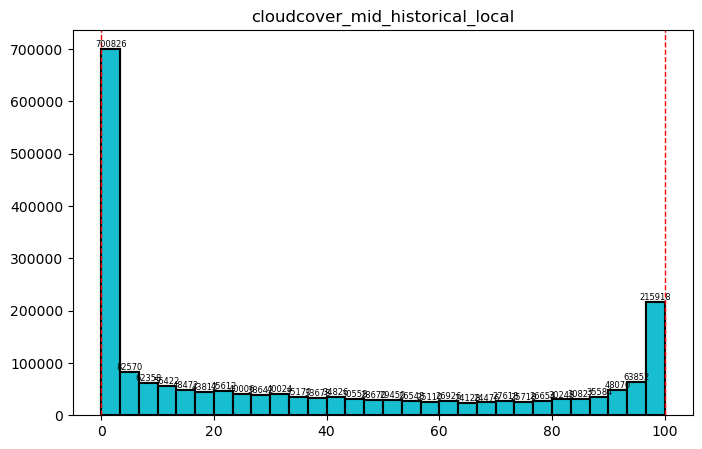

Analizing column: ***cloudcover_high_historical_local***
data type of column: float32
num zeros: 675326 | num_nulls: 35056
minimum: 0.0 | maximum: 100.0 | mean: 36.08938980102539 | std: 40.280792236328125


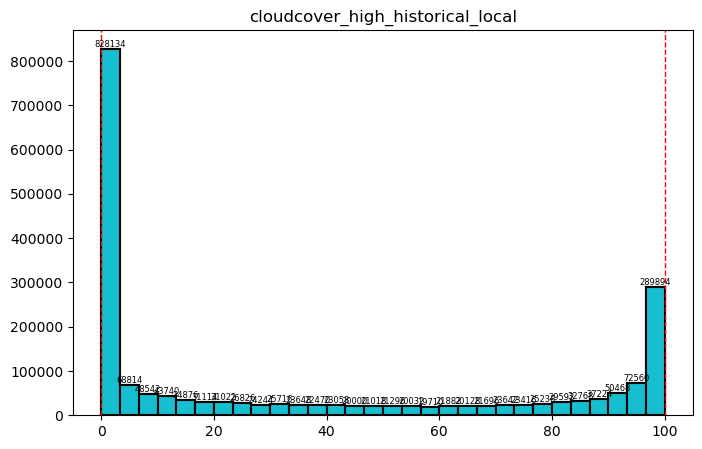

Analizing column: ***windspeed_10m_historical_local***
data type of column: float32
num zeros: 26 | num_nulls: 35056
minimum: 0.0 | maximum: 15.30555534362793 | mean: 4.233065605163574 | std: 1.9210262298583984


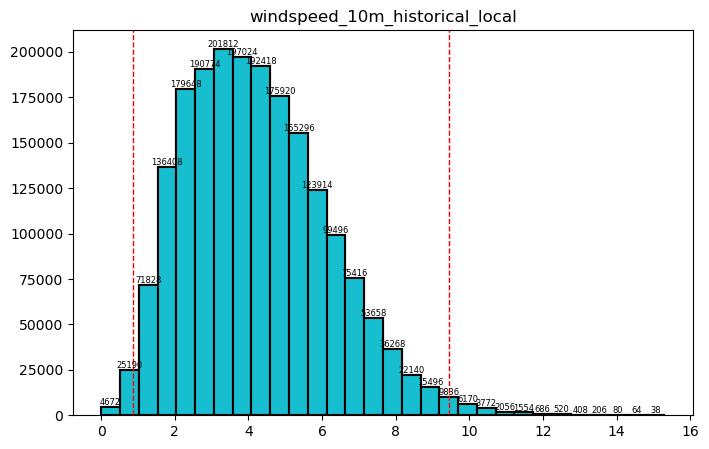

Analizing column: ***winddirection_10m_historical_local***
data type of column: float32
num zeros: 0 | num_nulls: 35056
minimum: 1.0 | maximum: 360.0 | mean: 198.62693786621094 | std: 85.08871459960938


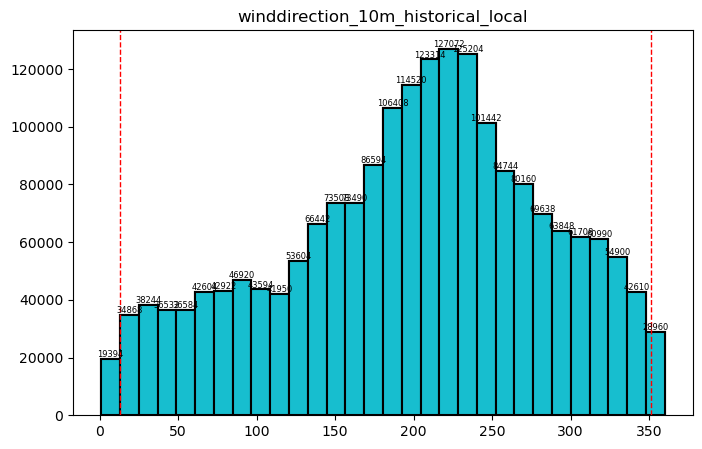

Analizing column: ***shortwave_radiation_historical_local***
data type of column: float32
num zeros: 981578 | num_nulls: 35056
minimum: 0.0 | maximum: 826.2000122070312 | mean: 104.50169372558594 | std: 177.3955078125


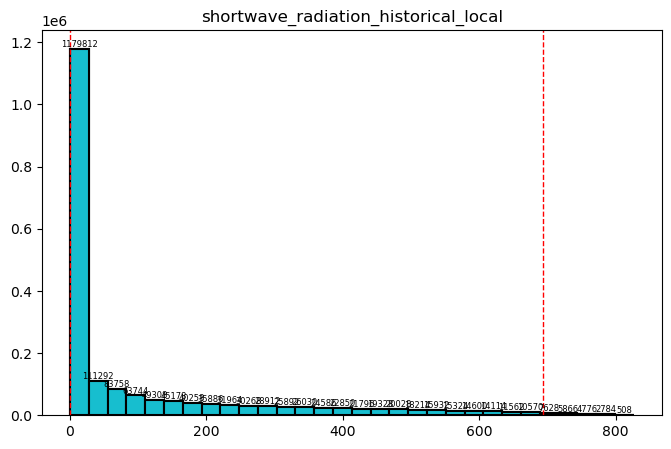

Analizing column: ***direct_solar_radiation_historical_local***
data type of column: float32
num zeros: 1107624 | num_nulls: 35056
minimum: 0.0 | maximum: 710.5999755859375 | mean: 61.94342803955078 | std: 129.09152221679688


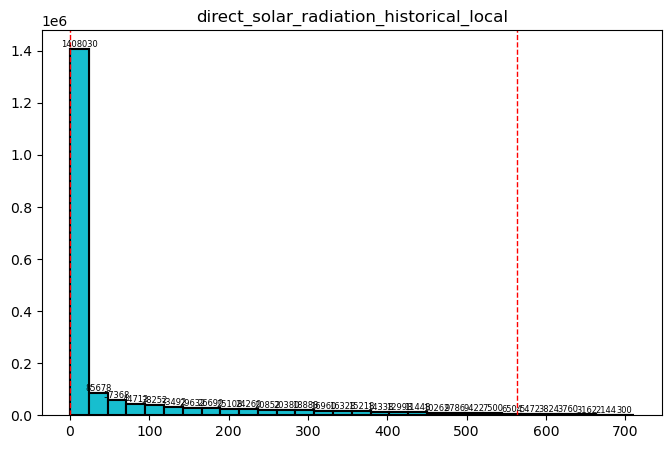

Analizing column: ***diffuse_radiation_historical_local***
data type of column: float32
num zeros: 981578 | num_nulls: 35056
minimum: 0.0 | maximum: 383.0 | mean: 42.5582275390625 | std: 63.0734748840332


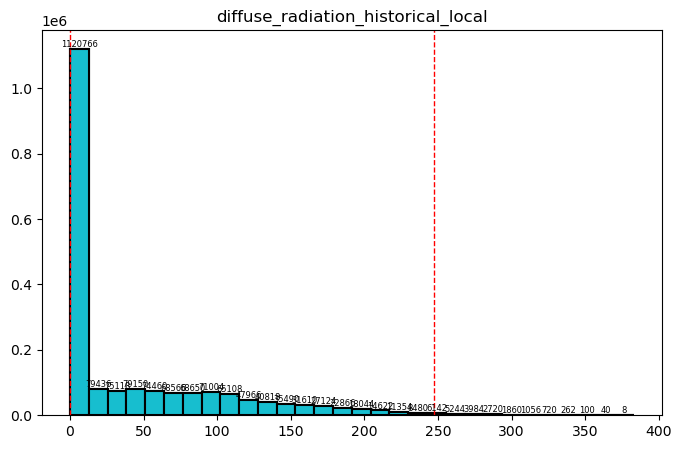

Analizing column: ***hour***
data type of column: uint32
num zeros: 84098 | num_nulls: 0
minimum: 0 | maximum: 23 | mean: 11.502224178124553 | std: 6.9217279784914725


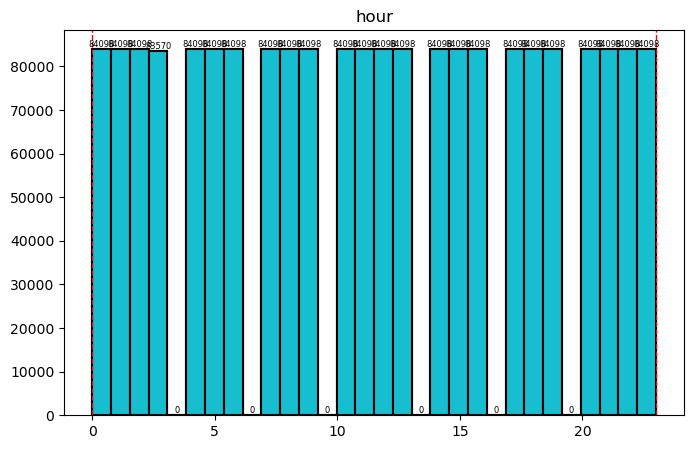

Analizing column: ***day***
data type of column: uint32
num zeros: 0 | num_nulls: 0
minimum: 1 | maximum: 31 | mean: 15.698219468100291 | std: 8.784825681030695


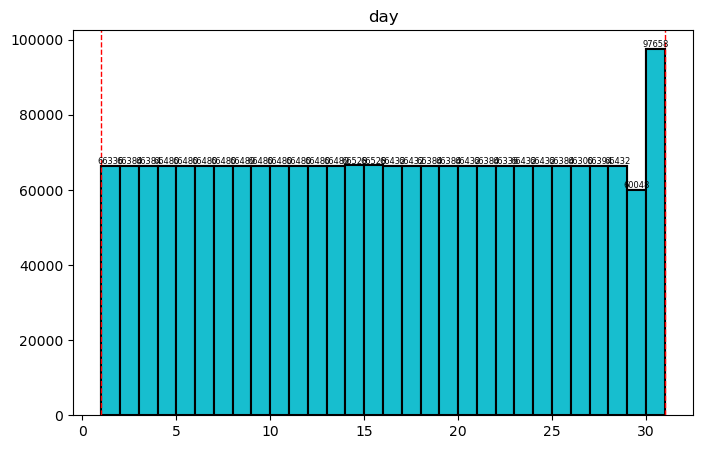

Analizing column: ***weekday***
data type of column: uint32
num zeros: 0 | num_nulls: 0
minimum: 1 | maximum: 7 | mean: 3.9973357438508015 | std: 1.9986185391479763


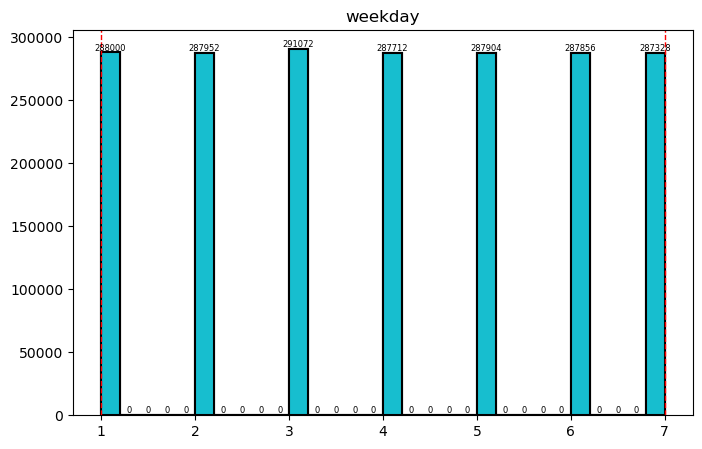

Analizing column: ***month***
data type of column: uint32
num zeros: 0 | num_nulls: 0
minimum: 1 | maximum: 12 | mean: 6.430605444280571 | std: 3.664933363463544


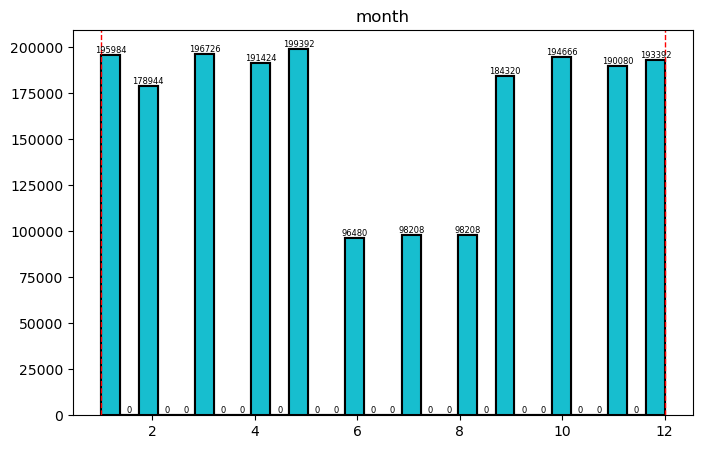

Analizing column: ***year***
data type of column: int32
num zeros: 0 | num_nulls: 0
minimum: 2021 | maximum: 2023 | mean: 2022.0568503496836 | std: 0.6452195774014198


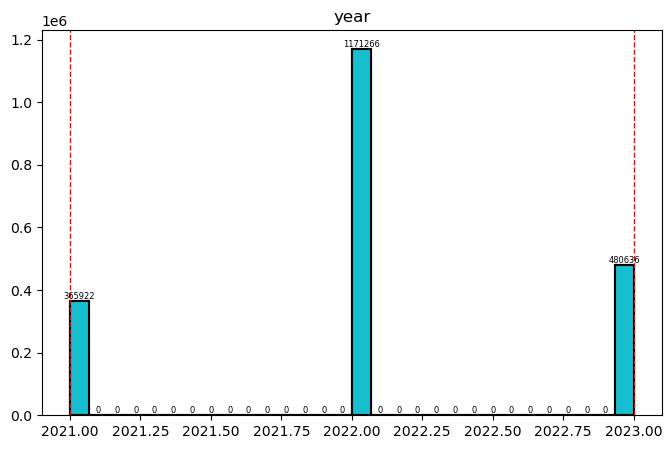

Analizing column: ***sin(dayofyear)***
data type of column: float32
num zeros: 0 | num_nulls: 0
minimum: -0.9999631643295288 | maximum: 0.9999631643295288 | mean: 0.038506828248500824 | std: 0.7345899939537048


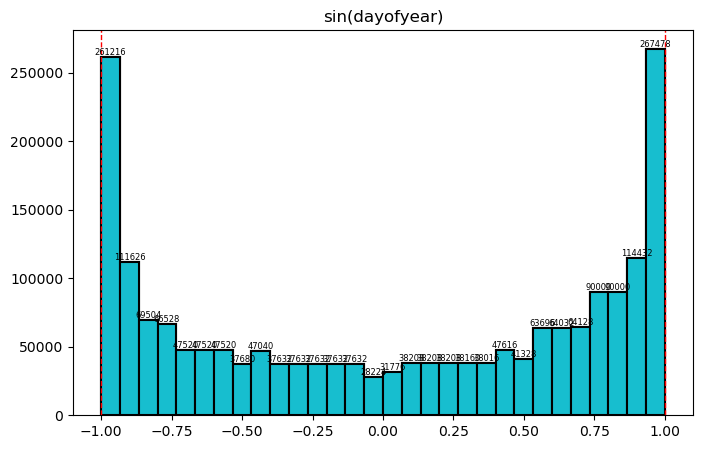

Analizing column: ***cos(dayofyear)***
data type of column: float32
num zeros: 0 | num_nulls: 0
minimum: -1.0 | maximum: 0.9998526573181152 | mean: 0.12039250135421753 | std: 0.6656137704849243


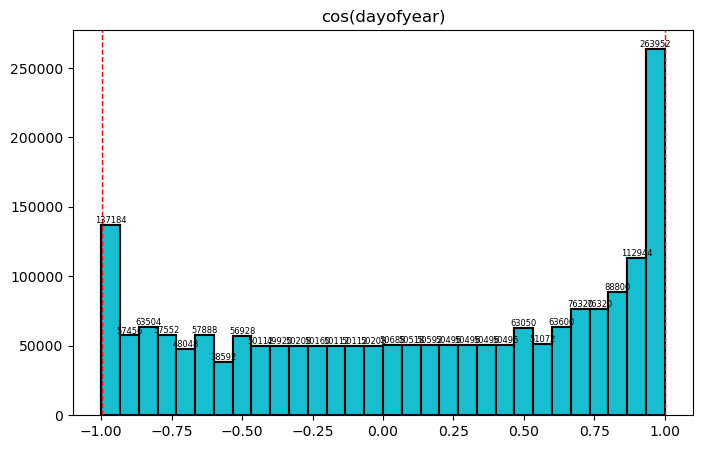

Analizing column: ***sin(hour)***
data type of column: float32
num zeros: 84098 | num_nulls: 0
minimum: -1.0 | maximum: 1.0 | mean: -0.0001850263070082292 | std: 0.7071071863174438


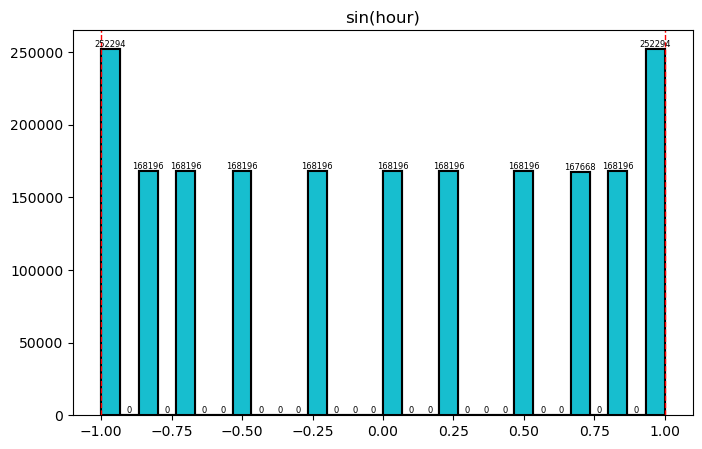

Analizing column: ***cos(hour)***
data type of column: float32
num zeros: 0 | num_nulls: 0
minimum: -1.0 | maximum: 1.0 | mean: -0.0001850275439210236 | std: 0.7071064710617065


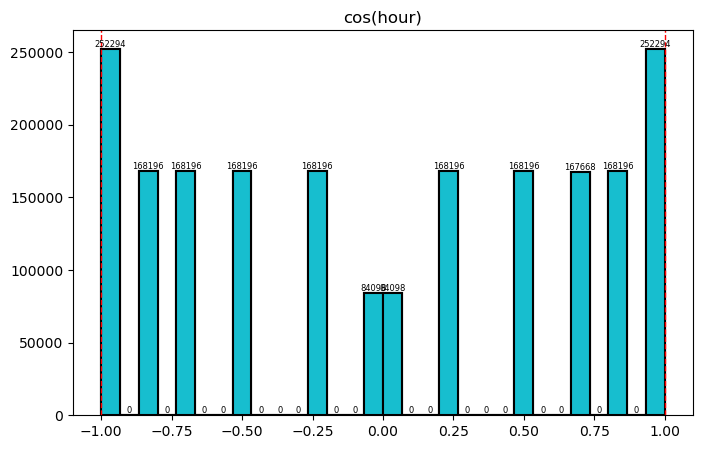

Analizing column: ***target***
data type of column: float64
num zeros: 351496 | num_nulls: 0
minimum: 0.0 | maximum: 15480.274 | mean: 274.85556009889865 | std: 909.5023780169362


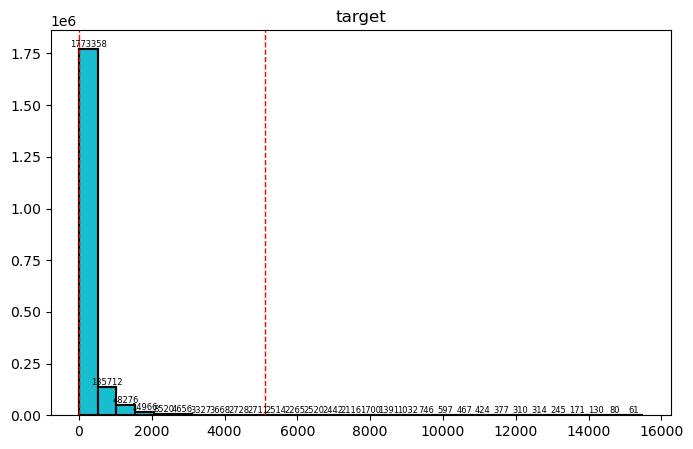

Analizing column: ***target_mean***
data type of column: float32
num zeros: 281102 | num_nulls: 8304
minimum: 0.0 | maximum: 14290.9482421875 | mean: 274.0841979980469 | std: 886.2763061523438


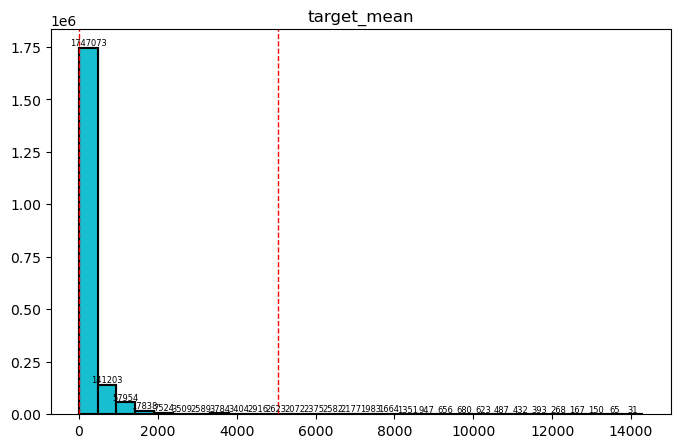

Analizing column: ***target_std***
data type of column: float32
num zeros: 280552 | num_nulls: 12624
minimum: 0.0 | maximum: 4943.98828125 | mean: 67.17150115966797 | std: 206.41766357421875


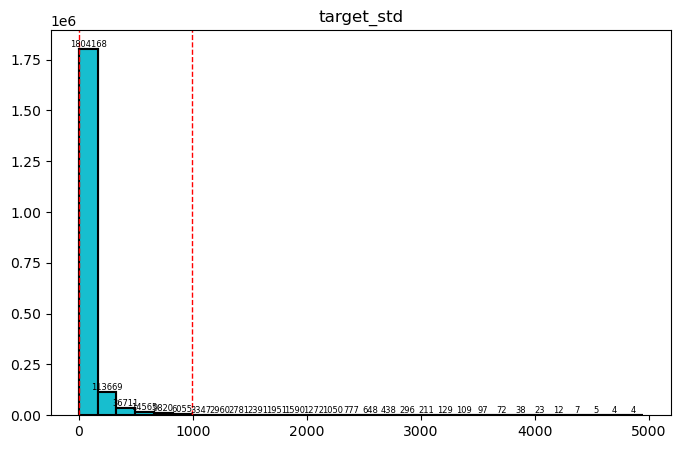

Analizing column: ***target_ratio***
data type of column: float32
num zeros: 343083 | num_nulls: 57398
minimum: 0.0 | maximum: 879469.9375 | mean: 58.96440887451172 | std: 2605.795166015625


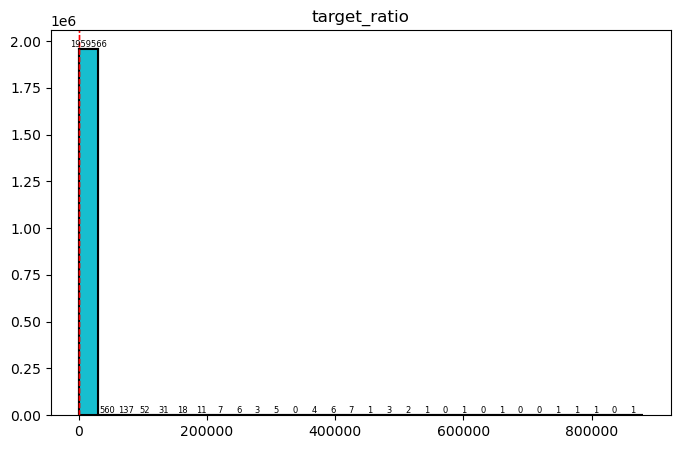

In [19]:
# plt the histogram
# Filter out columns which were replecated from a different row (weather history/prediction from 1 week ago, and target from 1-7 days ago)
numeric_cols_for_analysis = [col for col in numeric_cols if (col[-4:] != "week") and (not col[-1].isnumeric())]
print(len(numeric_cols_for_analysis))
print(numeric_cols_for_analysis)
plot_histograms_with_percentiles(numeric_cols_for_analysis, df_full)

<span style='color:red'> **[Your insights go here. To be completed by you]** </span>

# challenges with the data 
1. The first and foremost challenge I found in the data is that it is comprised of a few different datasets that aren't necessarily belong together: Consumption of data is not related, and is influenced from different features, to the production of solar energy. In addition, it is not clear whether the data about businesses and individual consumption is related and belong together.
2. The dataset shows some evidence for missing values in rows like lowest_price_per_mwh, lowest_price_per_mwh, eic_count, dewpoint_fdw. In some of those cases, it is still ok to use that row for some predictions (for example, dewpoint is not crusial for predicting electricity consumption). However, in some cases the columns is absolutely crusial for prediction, and the rows with missing values should be dropped. 
Example for critical columns that rows should be dropped in case they have missing values **installed_capacity** number of photovoltaic solar panels, and **eic_count** - aggregated number of consumption points for the segment.

In addition, there are multiple columns in which there are many zeros. This is expected and normal in columns like direct_solar_radiation, since there are many hours a day in which there is no sun radiation at all. It is also normal and expected in columns like snowfall or total_perticipation where there are many hours in which no rain or snow is falling. However, in some columns those values might be suspected as missing, for example in columns like cloudcover_high, where it is not clear whether in such a big percentage of the data there are no clouds whatsoever.
3. Another problem of the data is some outliers: The first plots demonstrated how in the months September-December of 2021 (the first few months of the data) there are some patters that seems unrelated to the rest of the data. Therefore, we might choose not to use the first few months, and begin the training on January 2022. The dataset includes some outliers in other columns rather than the target as well: Specifically in columns that are related to precipitation, rain and snowfall, as well as sun radiation.
4. Another problem in the data is the different scales of the different columns: While snowfall ranges from 0 to 2.24, solar radiation ranges from 0 to over 670. This may create a situation where different features have bigger impact on the model due to their larger scales.

# Pre-processing
In this section I will address the problem I found and raised in the previous section and pre-process the data for the model

1. Split the dataset into separated dataset that have more in common: Production, Private consumption and Business consumption

In [20]:
df_data        = pl.read_csv(os.path.join(root, "train.csv"), columns=data_cols, try_parse_dates=True)
df_client      = pl.read_csv(os.path.join(root, "client.csv"), columns=client_cols, try_parse_dates=True)
df_gas         = pl.read_csv(os.path.join(root, "gas_prices.csv"), columns=gas_cols, try_parse_dates=True)
df_electricity = pl.read_csv(os.path.join(root, "electricity_prices.csv"), columns=electricity_cols, try_parse_dates=True)
df_forecast    = pl.read_csv(os.path.join(root, "forecast_weather.csv"), columns=forecast_cols, try_parse_dates=True)
df_historical  = pl.read_csv(os.path.join(root, "historical_weather.csv"), columns=historical_cols, try_parse_dates=True)
df_location    = pl.read_csv(os.path.join(root, "weather_station_to_county_mapping.csv"), columns=location_cols, try_parse_dates=True)
df_target      = df_data.select(target_cols)

schema_data        = df_data.schema
schema_client      = df_client.schema
schema_gas         = df_gas.schema
schema_electricity = df_electricity.schema
schema_forecast    = df_forecast.schema
schema_historical  = df_historical.schema
schema_target      = df_target.schema

In [21]:
# Manipulate the df_data before it is merged with the other datasets, to make sure it is splitted before it processed

def production_consumption_business_split(df):
    df_consumption = df[df['is_consumption'] == 1]
    df_production = df[df['is_consumption'] == 0]


    df_business_consumption = df_consumption[df_consumption['is_business'] == 1]
    df_private_consumption = df_consumption[df_consumption['is_business'] == 0]
    return df_production.copy(), df_business_consumption.copy(), df_private_consumption.copy()

df_production, df_business_consumption, df_private_consumption = production_consumption_business_split(df_full)


**Handle Nulls**

In [23]:
drop_nulls = ["installed_capacity", "eic_count"]

def handle_nulls(cols, cols_to_drop_nulls, df, df_name):
    print (f"Before dropping nulls, {df_name} had {len(df)} rows")
    for col in cols:
        nulls_count = (df[col].isna()).sum()
        print(f"column: {col}: found {nulls_count} nulls.")
        if nulls_count == 0:
            continue
        if col in cols_to_drop_nulls or nulls_count < 200: # If the number of nulls is neglectible, remove the rows
            num_nulls = df[col].isna().sum()
            print(f"dropping {num_nulls} in col {col}")
            df.dropna(subset=[col], inplace=True)
        else:
            mean = df[col].mean()
            print(f"replacing nulls with mean: {mean}")
            df[col].fillna(mean, inplace=True)
    print (f"After dropping nulls, {df_name} has {len(df)} rows")
    return df

df_full = handle_nulls(df_full.columns, drop_nulls, df_full, "df_full")


Before dropping nulls, df_full had 2017824 rows
column: county: found 0 nulls.
column: is_business: found 0 nulls.
column: product_type: found 0 nulls.
column: is_consumption: found 0 nulls.
column: lowest_price_per_mwh: found 2928 nulls.
replacing nulls with mean: 95.46879577636719
column: highest_price_per_mwh: found 2928 nulls.
replacing nulls with mean: 108.31099700927734
column: eic_count: found 8640 nulls.
dropping 8640 in col eic_count
column: installed_capacity: found 0 nulls.
column: euros_per_mwh: found 266 nulls.
replacing nulls with mean: 157.57177734375
column: hours_ahead: found 0 nulls.
column: temperature: found 0 nulls.
column: dewpoint: found 0 nulls.
column: cloudcover_high: found 0 nulls.
column: cloudcover_low: found 0 nulls.
column: cloudcover_mid: found 0 nulls.
column: cloudcover_total: found 0 nulls.
column: 10_metre_u_wind_component: found 0 nulls.
column: 10_metre_v_wind_component: found 0 nulls.
column: direct_solar_radiation: found 0 nulls.
column: surface_

Train test split to avoid messing with the targets of the test set

**Add more features**

Based on the analysis results, add the following features:
- Is weekend, which can help predict business electricity consumption
- Sin (month * pi/12), which is highest in the summer months arround June and lowest in the winter months arround December
- Is working hours, to flag hours between 9 to 5 during weekdays, to help predict business consumption

In [24]:
def add_features(df):
    df["is_weekend"] = df.apply(lambda x: 1.0 if x['weekday'] in {5,6} else 0.0, axis=1) # weekday begins in Monday = 0
    df["sin(month)"] = df.apply(lambda x: np.sin(np.pi * x['month'] / 12.0), axis=1) # To represent the seasons: Low value for winter months arround 1/12, high for summer (6-7-8)
    df["is_workin_hour"] = df.apply(lambda x: 1.0 if ((9 <= x['hour'] <= 17) and (x["is_weekend"] == 0)) else 0.0, axis=1)
    county_encoded = pd.get_dummies(data=df['county'], prefix='county_', dtype=float)
    product_type_encoded = pd.get_dummies(data=df['product_type'], prefix='product_type_', dtype=float)
    
    # After encoding the categorical columns, replace the original data with the encoded data
    df = df.drop(columns=['county', 'weekday', 'hour', 'month', 'product_type'], axis=1)
    df = pd.concat([df, county_encoded, product_type_encoded], axis=1)
    return df

In [25]:
def pre_process_full(cols, drop_nulls, df, df_name):
    df = handle_nulls(df.columns, drop_nulls, df, df_name)
    df = add_features(df)
    return df


### Task and evaluation (10%)

**Guidelines**: Tell us a bit about the main task that in your view this dataset could help solve and propose and justify the evaluation criteria that would be important here, not only considering the task but your exploratory data analysis. For example, if you found that there is class imbalance in the dataset and that the most important class is the minority one, you may want to add costs in your evaluation metric to account for it, or maybe you want to use a metric specifically suited for imbalanced classification.

<span style='color:red'> **[To be completed by you]** </span>

**Task**

The task that could be performed with the use of this dataset is prediction of energy consumption and production of prosumers, to reduce energy imbalance. As mentioned before, the prosumers in this case are Estonian energy consumer who have installed photovoltaic solar panels, and are producing solar energy.

Energy imbalance is a situation where the energy expected to be used or produced doesn't line up with the actual energy used or produced. It causes inefficiencies, energy waste, voltage instability in the electrical grid and money waste. Prosumers, who both consume and generate energy, contribute twice to the energy imbalance: both as consumers and as producers. Due to the intermittentence of solar energy, and its dependency on weather conditions, it makes the task of balancing the grid even more complex. With the increasing integration of renewable energy sources like solar, energy imbalances become more challenging to manage. Thus, despite the fact that prosumers are only a small part of all consumers, their unpredictable energy use causes inefficiencies and energy waste for the energy companies.

Improving the prediction of energy consumption and production of prosumers could not only improve current grid's stability and save energy and money, but also incentivise more and more consumers to become prosumers themselves, by improving the efficiency and the value those prosumers add to the system, and improving the prices for them.

**Evaluation Criteria**

The evaluation criteria chosen by the competition guidelines is **mean absolute error**. In my opinion, this is very intuitive and relevant for the problem for the following reasons:
Firstly, it is is expressed in the same units as the electricity consumption/production of the target. This makes the error directly interpretable in the context of the problem and facilitates a clear understanding of the scale of the errors. By simply looking at the error of the prediction, the electricity company could understand exactly how much extra/shortage of electricity is expected, and immediately understand the costs and the implication and take decisions. 

Secondly, when thinking at the problem at hand, it makes sense that the error will be linear with the cost of extra, unused electricity, or with the shortage of electricity that creates instability. Unlike other regression problems, where small mistakes could be neglectible while the price on larger mistakes is much more serious, in this domain the cost of an error is linear with the size of the error: ten unused megawatt an hour will cost the company exactly 10 times more than 1 unused megawatt an hour.

### Design and build an ML system (20%)

**Guidelines**: Taking into account the task and evaluation criteria set in the previous section design and build now an ML system. If you go for supervised learning, you could start by partiting your dataset in train and test here and try a model on the dataset. But please justify your choices in each case. Why did you choose a specific ML model? Why is it relevant for the task and dataset at hand? Do you envision any challenges with the use of such model? 

Again, we do not ask for a specific model to be used. Instead, we will evaluate the depth and appropriatedness of your analysis. As this section (and some of the following ones) are more open ended we do not specify marks for each question.


***
Please note that if the dataset of your choice is too large to work with, you can simply choose a subset of it. We will not substract any marks for doing so. 
***


**1. Train, validation, test split according to dates**

In [26]:
# your model building code goes here
from datetime import datetime

def train_val_test_split(df):
    # Train data set to include exactly 1 year long data - To avoid imbalance of having more data on specific months
    trainset_begin = datetime(year=2022, month=1, day=1)
    trainset_end = datetime(year=2023, month=1, day=1)

    # make sure that both test sets and validation set consist of one winter month, and one transition month, to allow the model to be evaluated on both
    winter_validation_begin = datetime(year=2023, month=1, day=1)
    winter_validation_end = datetime(year=2023, month=2, day=1)
    spring_validation_begin = datetime(year=2023, month=4, day=1)
    spring_validation_end = datetime(year=2023, month=5, day=1)

    winter_testset_begin = datetime(year=2023, month=2, day=1)
    winter_testset_end = datetime(year=2023, month=3, day=3)
    spring_testset_begin = datetime(year=2023, month=5, day=1)
    spring_testset_end = datetime(year=2023, month=6, day=1)

    df_data_train = df_data.filter((pl.col('datetime') >= trainset_begin) & (pl.col('datetime') < trainset_end)) 
    df_data_validation = df_data.filter(((pl.col('datetime') >= spring_validation_begin) & (pl.col('datetime') < spring_validation_end)) | ((pl.col('datetime') >= winter_validation_begin) & (pl.col('datetime') < winter_validation_end)))
    df_data_test = df_data.filter(((pl.col('datetime') >= winter_testset_begin) & (pl.col('datetime') < winter_testset_end)) | ((pl.col('datetime') >= spring_testset_begin) & (pl.col('datetime') < spring_testset_end)))

    return df_data_train, df_data_validation, df_data_test


In [27]:
def split_and_convert_df_to_pandas(df_data):
    df_data_train, df_data_val, df_data_test = train_val_test_split(df_data)
    X_train, y_train = df_data_train.drop("target"), df_data_train.select("target")
    X_val, y_val = df_data_val.drop("target"), df_data_val.select("target")
    X_test, y_test = df_data_test.drop("target"), df_data_test.select("target")

    X_train = basic_feature_eng(X_train, df_client, df_gas, df_electricity, df_forecast, df_historical, df_location, df_target)
    X_val = basic_feature_eng(X_val, df_client, df_gas, df_electricity, df_forecast, df_historical, df_location, df_target)
    X_test = basic_feature_eng(X_test, df_client, df_gas, df_electricity, df_forecast, df_historical, df_location, df_target)

    df_train_full = to_pandas(X_train, y_train)
    df_val_full = to_pandas(X_val, y_val)
    df_test_full = to_pandas(X_test, y_test)

    df_train_full = df_train_full[df_train_full["target"].notnull()]
    df_val_full = df_val_full[df_val_full["target"].notnull()]
    df_test_full = df_test_full[df_test_full["target"].notnull()]
    return df_train_full.copy(), df_val_full.copy(), df_test_full.copy()



**As a best practice to avoid data leakage, call the preprocessing methods AFTER splitting the data to train/test**

In [28]:
df_full_train, df_full_val, df_full_test = split_and_convert_df_to_pandas(df_data)

In [29]:
df_full_train = pre_process_full(df_full_train.columns, drop_nulls, df_full_train, "df_full_train")
df_full_val = pre_process_full(df_full_val.columns, drop_nulls, df_full_val, "df_full_val")
df_full_test = pre_process_full(df_full_test.columns, drop_nulls, df_full_test, "df_full_test")

Before dropping nulls, df_full_train had 1171266 rows
column: county: found 0 nulls.
column: is_business: found 0 nulls.
column: product_type: found 0 nulls.
column: is_consumption: found 0 nulls.
column: lowest_price_per_mwh: found 0 nulls.
column: highest_price_per_mwh: found 0 nulls.
column: eic_count: found 1200 nulls.
dropping 1200 in col eic_count
column: installed_capacity: found 0 nulls.
column: euros_per_mwh: found 134 nulls.
dropping 134 in col euros_per_mwh
column: hours_ahead: found 0 nulls.
column: temperature: found 0 nulls.
column: dewpoint: found 0 nulls.
column: cloudcover_high: found 0 nulls.
column: cloudcover_low: found 0 nulls.
column: cloudcover_mid: found 0 nulls.
column: cloudcover_total: found 0 nulls.
column: 10_metre_u_wind_component: found 0 nulls.
column: 10_metre_v_wind_component: found 0 nulls.
column: direct_solar_radiation: found 0 nulls.
column: surface_solar_radiation_downwards: found 0 nulls.
column: snowfall: found 0 nulls.
column: total_precipitati

**2. Split dataset to 3 separated sub-datasets to train 3 separated different models**

In [34]:
df_production_train, df_business_consumption_train, df_private_consumption_train = production_consumption_business_split(df_full_train)
df_production_val, df_business_consumption_val, df_private_consumption_val = production_consumption_business_split(df_full_val)
df_production_test, df_business_consumption_test, df_private_consumption_test = production_consumption_business_split(df_full_test)

**3. Remove columns that are unnecessary for the model**

In [35]:
dfs = {"business_consumption": [df_business_consumption_train, df_business_consumption_val, df_business_consumption_test],
        "private_consumption": [df_private_consumption_train, df_private_consumption_val, df_private_consumption_test],
        "production": [df_production_train, df_production_val, df_production_test],}

remove_cols = {"production": ["lowest_price_per_mwh", "highest_price_per_mwh", "euros_per_mwh",  "is_consumption", "is_business"],
               "business_consumption": ["is_business"],
               "private_consumption": ["is_business"]}
remove_from_all = ["day", "is_consumption", "year", "category_1"]

def remove_unnecesary_cols(cols, df, df_category):
    print(f"Before removing columns from {df_category}.\n df has {len(df.columns)} columns")
    df.drop(columns=cols+remove_from_all, inplace=True)
    print(f"df now has {len(df.columns)} columns")

In [36]:
for df_category, dfs_list in dfs.items():
    for df in dfs_list:
        remove_unnecesary_cols(remove_cols[df_category], df, df_category)

Before removing columns from business_consumption.
 df has 156 columns
df now has 151 columns
Before removing columns from business_consumption.
 df has 156 columns
df now has 151 columns
Before removing columns from business_consumption.
 df has 156 columns
df now has 151 columns
Before removing columns from private_consumption.
 df has 156 columns
df now has 151 columns
Before removing columns from private_consumption.
 df has 156 columns
df now has 151 columns
Before removing columns from private_consumption.
 df has 156 columns
df now has 151 columns
Before removing columns from production.
 df has 156 columns
df now has 148 columns
Before removing columns from production.
 df has 156 columns
df now has 148 columns
Before removing columns from production.
 df has 156 columns
df now has 148 columns


**4. Selected model: XGBoost with regressor:absoluteerror**

In [38]:
from xgboost import XGBRegressor
    

if load_path is not None:
    model = pickle.load(open(load_path, "rb"))
else:
    # Build a random forest for each of the sub tasks
    model_business_consumption = XGBRegressor(n_estimators=20, objective='reg:absoluteerror', max_depth=5, colsample_bytree=0.5, subsample=0.8, random_state=30)
    model_private_consumption =  XGBRegressor(n_estimators=20, objective='reg:absoluteerror', max_depth=5, colsample_bytree=0.5, subsample=0.8, random_state=31)
    model_production =  XGBRegressor(n_estimators=20, objective='reg:squarederror', max_depth=5, colsample_bytree=0.5, subsample=0.8, random_state=32)

    print("training model_business_consumption")
        
    model_business_consumption.fit(
        X=df_business_consumption_train.drop(columns=["target"]),
        y=df_business_consumption_train["target"]
    )

    print("training model_private_consumption")


    model_private_consumption.fit(
        X=df_private_consumption_train.drop(columns=["target"]),
        y=df_private_consumption_train["target"]
    )

    print("training model_production")

    model_production.fit(
        X=df_production_train.drop(columns=["target"]),
        y=df_production_train["target"]
    )


training model_business_consumption
training model_private_consumption
training model_production


<span style='color:red'> **[Your insights go here. To be completed by you]** </span>

**1. Train, validation, test split according to dates - Justification**

In the beginning, I started with a random train/test split along all dates and hours, by a complete shuffle process. 
I then noticed the model has learnt and performed extremely well on the test set. Looking into the numbers, I then understood the model has exhibits data leakage: For example, by learning from examples on November 4th 2022 at 16:00, the model was able to perform extremely well when predicting the data consumption and production of the same day at 15:00.

After noticing this fact, I decided to split the data according to chronological order. Just like when the model is deployed, it will be trained on past data, deployed, and then expected to perform on future data. I then decided to train the model on data from one whole year (2022), and then validate and test it on data from the "future" - 2023.

After experimenting a bit with validation and test sets, I understood that the model performs quite well on winter data: Especially the production model. This is inline with the data analysis conclusions, which showed that in the winter there is very minimal energy production. I therefore decided that to evaluate the model properly, both test and validation sets should include at least one "spring" month, to make it harder for prediction and better represent the model's performance in real world.

**2. Split dataset to 3 separated sub-datasets to train 3 separated different models - Justification**

As mentioned in the data analysis section, I have decided to break down the task into 3 sub-tasks. Each of those consists of subset of the complete dataset:
- Electricity production with solar panels
- Electricity consumption by business sector
- Electricity consumption by private sector

As elaborated in previous sections, each of these substasks has its own unique patterns and correlations between the target and the different features (for example, businesses use more electiricy during working hours than private people during week days. Businesses don't use so much electricity at night as opposed to private people)

**3. Remove columns that are unnecessary for the model - Justification**
Last thing, before feeding the models with the datasets for training, we can remove all unnecesary columns that were used earlier in the process for understanding the data, and for calculating more elaborated features from it. I decided to do it just before the model training to have those columns available along the processes of data analysis, train/test split, and production/consumption/business split.

**4. Selected mode: XGBoost with regressor:absoluteerror - Justification**
At the beginning, my first attempt was to try the **Random Forest Regression**"** model. This was due to the fact that the data contains many layers of interractions between the different features, that seems like they will be accurately captured with many decision trees.
For example, lets take the business electricity consumption: As shown in the data analysis section, for predicting this target we need to take into account intersection between many variables: Is it summer? If it is: Is it daytime? If it is: What is the cloud cover levels?
The random forrest is designed to capture exactly that, as it builds many decision trees, each of them contains a few features, and sets a threshold to make a binary decision according to this feature.

**However**, the model had some severe disadvantages: It was both very slow, and it did not provide good results relative to the baseline model. Interestingly, it showed high error not only on test set, but also on train set, which indicates it wasn't able to properly learn. Therefore, I decided to keep the idea of decision trees, but change to the model selection to XGBoost (Extreme Gradient Boosting): a scalable, distributed implementation of the **Gradient boosting** decision tree algorithm. 
"Gradient Boosting" technique differs from Random Forest in the fact that instead of training each of the decision trees separately and taking their average, it iteratively uses the gradient to minimize the loss on the next tree. It optimizes the loss function by adding weak models that correct the errors made by the existing ensemble of trees. The sequential nature of boosting allows it to focus on the most challenging examples, making it effective with fewer trees.
XGBoost appeard to be not only much more accurate on train and test data, but also a lot faster. This is due to trees pruning of branches that do not provide significant improvements in the loss function, and the parallelistic implementation.

**regressor:abosluteerror** justification: In the beginning, I chose to use the evaluation criterea as the regressor type. The logic was to allow the model to optimize for the actual evaluation criterea I wish to optimize for. However, later on this turned out to be a wrong decision. Therefore, I changed in in the following section.




### Experimental analysis (performance & scalability) (20%)

**Guidelines**: Test your model here. You can do hyper-parameter tuning and any ablation studies you consider important. How does your model perform? Is there any room for improvement? If so, what do you think it's needed? Comment as well on how does the model compare to previous baselines (yours or from the literature). Do you think model's performance is enough for the application that you are aiming to address? Is the model scalable to a real-world application? Is training data enough for such an application? How does the model's performance compare to a more/less computationally heavy model? Some of these questions may be more or less relevant depending on your application, so we leave it up to you to decide which factors in terms of performance and scalability you consider most important to evaluate.


In [39]:

# your experimental study here 
from sklearn import metrics

def evaluate_model(input_model, df_train_full, df_val_full, df_test_full, model_name):
   print(f"Evaluating {model_name}")    
   test_targets = df_test_full["target"]
   test_predictions = input_model.predict(X=df_test_full.drop(columns=["target"]))
   test_mae = metrics.mean_absolute_error(test_targets, test_predictions)

   print(f"{model_name} mean absolute error on test set: {test_mae}")

   val_targets = df_val_full["target"]
   val_predictions = input_model.predict(X=df_val_full.drop(columns=["target"]))
   val_mae = metrics.mean_absolute_error(val_targets, val_predictions)

   print(f"{model_name} mean absolute error on validation set: {val_mae}")

   train_targets = df_train_full["target"]
   train_predictions = input_model.predict(X=df_train_full.drop(columns=["target"]))
   train_mae = metrics.mean_absolute_error(train_targets, train_predictions)

   print(f"{model_name} mean absolute error on train set: {train_mae}")

evaluate_model(model_production, df_production_train, df_production_val, df_production_test, "model_production")
evaluate_model(model_business_consumption, df_business_consumption_train, df_business_consumption_val, df_business_consumption_test, "model_business_consumption")
evaluate_model(model_private_consumption, df_private_consumption_train, df_private_consumption_val, df_private_consumption_test, "model_private_consumption")

Evaluating model_production
model_production mean absolute error on test set: 54.46768466263223
model_production mean absolute error on validation set: 37.536561709479024
model_production mean absolute error on train set: 23.75340606709941
Evaluating model_business_consumption
model_business_consumption mean absolute error on test set: 672.1028109483179
model_business_consumption mean absolute error on validation set: 699.0186282623798
model_business_consumption mean absolute error on train set: 607.1884003880955
Evaluating model_private_consumption
model_private_consumption mean absolute error on test set: 149.45230401863103
model_private_consumption mean absolute error on validation set: 173.83960136595132
model_private_consumption mean absolute error on train set: 92.39060391077686


**Run Baseline model in my framework to compare results**

Firstly, I compared the performance of my model to the performance of the basline model publicly shared in Kaggle. It was important to run this model locally and be able to evaluate it with my data split, as the published score on Kaggle is only tested on small data from May, and will continue to be calculated with future data. 
Attached here is the code of the reproduction of the published code and evaluation on my data split. I changed the number of iterations from 1500 to 600 to save computation time, as it didn't have a major effect on the results.

In [510]:
p1={'n_iter': 600,'verbose': -1,'objective': 'l2','learning_rate': 0.05670084478292278, 'colsample_bytree': 0.6440444070196796, 'colsample_bynode': 0.637635804565811, 'lambda_l1': 6.29090474401462, 'lambda_l2': 6.775341543233317, 'min_data_in_leaf': 95, 'max_depth': 9, 'max_bin': 630}
p2={'n_iter': 600,'verbose': -1,'objective': 'l2','learning_rate': 0.0632167263149817, 'colsample_bytree': 0.6958033941948067, 'colsample_bynode': 0.6030801666196094, 'lambda_l1': 7.137580620471935, 'lambda_l2': 9.348169401713742, 'min_data_in_leaf': 74, 'max_depth': 11, 'max_bin': 530}
p3={'n_iter': 600,'verbose': -1,'objective': 'l2','learning_rate': 0.061236402165228264, 'colsample_bytree': 0.81427095118471, 'colsample_bynode': 0.6097376843527067, 'lambda_l1': 6.360490880385201, 'lambda_l2': 9.954136008333839, 'min_data_in_leaf': 238, 'max_depth': 16, 'max_bin': 649}
p4={'n_iter': 600,'verbose': -1,'objective': 'l2','learning_rate': 0.08753282378023663, 'colsample_bytree': 0.7508715107428325, 'colsample_bynode': 0.6831819500325418, 'lambda_l1': 8.679353563755722, 'lambda_l2': 6.105008696961338, 'min_data_in_leaf': 198, 'max_depth': 15, 'max_bin': 835}
p5={'n_iter': 600,'verbose': -1,'objective': 'l2','learning_rate': 0.05929380742257108, 'colsample_bytree': 0.6101576947777211, 'colsample_bynode': 0.6052639518604396, 'lambda_l1': 8.087311995794915, 'lambda_l2': 6.067361158677095, 'min_data_in_leaf': 122, 'max_depth': 9, 'max_bin': 797}
p6={'n_iter': 600,'verbose': -1,'objective': 'l2','learning_rate': 0.05689066836106983, 'colsample_bytree': 0.8915976762048253, 'colsample_bynode': 0.5942203285139224, 'lambda_l1': 7.6277555139102864, 'lambda_l2': 6.6591278779517808, 'min_data_in_leaf' : 156, 'max_depth': 11, 'max_bin': 813}
p7={'n_iter': 600,'verbose': -1,'objective': 'l2','learning_rate': 0.06210133914728566, 'colsample_bytree': 0.9394149364406023, 'colsample_bynode': 0.6136449922460668, 'lambda_l1': 6.8170120783290963, 'lambda_l2': 6.9413925098162625, 'min_data_in_leaf': 100, 'max_depth': 12, 'max_bin': 749}

base_model = VotingRegressor([
    ('lgb_1', lgb.LGBMRegressor(**p1, random_state=10)), 
    ('lgb_2', lgb.LGBMRegressor(**p2, random_state=10)), 
    ('lgb_3', lgb.LGBMRegressor(**p3, random_state=10)), 
    ('lgb_4', lgb.LGBMRegressor(**p4, random_state=10)), 
    ('lgb_5', lgb.LGBMRegressor(**p5, random_state=10)), 
    ('lgb_6', lgb.LGBMRegressor(**p6, random_state=10)),
    ('lgb_7', lgb.LGBMRegressor(**p7, random_state=10)),
],weights=[0.19,0.14,0.11,0.11,0.11,0.18,0.16])

base_model_solar = VotingRegressor([
    ('lgb_11', lgb.LGBMRegressor(**p1, random_state=11)), 
    ('lgb_12', lgb.LGBMRegressor(**p2, random_state=11)), 
    ('lgb_13', lgb.LGBMRegressor(**p3, random_state=11)), 
    ('lgb_14', lgb.LGBMRegressor(**p4, random_state=11)), 
    ('lgb_15', lgb.LGBMRegressor(**p5, random_state=11)), 
    ('lgb_16', lgb.LGBMRegressor(**p6, random_state=11)),
    ('lgb_17', lgb.LGBMRegressor(**p7, random_state=11)),
],weights=[0.19,0.14,0.11,0.11,0.11,0.18,0.16])
print(df_full_train.shape)
base_model.fit(
    X=df_full_train.drop(columns=["target"]),
    y=df_full_train["target"]
)

base_model_solar.fit(
    X=df_full_train[df_full_train['is_consumption']==0].drop(columns=["target"]),
    y=df_full_train[df_full_train['is_consumption']==0]["target"]
)

1170066


/Users/user/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/user/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/user/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/user/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_iter` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/user/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:172: UserWarning: Found `n_iter` i

VotingRegressor(estimators=[('lgb_11',
                             LGBMRegressor(colsample_bynode=0.637635804565811,
                                           colsample_bytree=0.6440444070196796,
                                           lambda_l1=6.29090474401462,
                                           lambda_l2=6.775341543233317,
                                           learning_rate=0.05670084478292278,
                                           max_bin=630, max_depth=9,
                                           min_data_in_leaf=95, n_iter=600,
                                           objective='l2', random_state=11,
                                           verbose=-1)),
                            ('lgb_12',
                             LGBMRegressor(colsample_bynod...
                                           objective='l2', random_state=11,
                                           verbose=-1)),
                            ('lgb_17',
                             LGBMRegressor(colsample_bynode=0.6136449922460668,
                                           colsample_bytree=0.9394149364406023,
                                           lambda_l1=6.817012078329096,
                                           lambda_l2=6.9413925098162625,
                                           learning_rate=0.06210133914728566,
                                           max_bin=749, max_depth=12,
                                           min_data_in_leaf=100, n_iter=600,
                                           objective='l2', random_state=11,
                                           verbose=-1))],
                weights=[0.19, 0.14, 0.11, 0.11, 0.11, 0.18, 0.16])

In [511]:
# Evaluate baseline model on baseline data
evaluate_model(base_model_solar, df_production_train, df_production_val, df_production_test, "base_model_solar - production data")
evaluate_model(base_model, df_business_consumption_train, df_business_consumption_val, df_business_consumption_test, "base_model - business_consumption data")
evaluate_model(base_model, df_private_consumption_train, df_private_consumption_val, df_private_consumption_test, "base_model - private_consumption data")

Evaluating base_model_solar - production data
base_model_solar - production data mean absolute error on test set: 51.17976394095061
base_model_solar - production data mean absolute error on validation set: 34.698572552381506
base_model_solar - production data mean absolute error on train set: 14.034149861624822
Evaluating base_model - business_consumption data
base_model - business_consumption data mean absolute error on test set: 92.29447695564674
base_model - business_consumption data mean absolute error on validation set: 107.80172381910212
base_model - business_consumption data mean absolute error on train set: 58.198456208825185
Evaluating base_model - private_consumption data
base_model - private_consumption data mean absolute error on test set: 26.464291691690082
base_model - private_consumption data mean absolute error on validation set: 29.751035235302826
base_model - private_consumption data mean absolute error on train set: 12.282560034888764


As the evaluation shows, the model XGBoost with my parameters has much worse performance than the published baseline model, which has great performance. 
However, the VotingRegressor (Baseline model) is more than 10 times slower than the XGBoost, and took over 10 minutes to train. In addition, it took a couple of minutes to evaluate as well, since every prediction has to be the average of 7 different models.

Therefore, there is an opportunity to improve the parameters of XGBoost to try and improve its results.

**1. Change regressor to squarederror**

Although the model will eventually be estimated and selected based on the absolute error, it is still much easier for the model to work with the squared error loss, as it is twice derivable and the algorithm uses the gradient for building the next iteration.

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
    
# Build a XBGRegressor for each of the sub tasks
model_business_consumption = XGBRegressor(n_estimators=20, objective='reg:squarederror', max_depth=5, colsample_bytree=0.5, subsample=0.8, random_state=30)
model_private_consumption =  XGBRegressor(n_estimators=20, objective='reg:squarederror', max_depth=5, colsample_bytree=0.5, subsample=0.8, random_state=31)
model_production =  XGBRegressor(n_estimators=20, objective='reg:squarederror', max_depth=5, colsample_bytree=0.5, subsample=0.8, random_state=32)

print("training model_business_consumption")
    
model_business_consumption.fit(
    X=df_business_consumption_train.drop(columns=["target"]),
    y=df_business_consumption_train["target"]
)

print("training model_private_consumption")


model_private_consumption.fit(
    X=df_private_consumption_train.drop(columns=["target"]),
    y=df_private_consumption_train["target"]
)

print("training model_production")

model_production.fit(
    X=df_production_train.drop(columns=["target"]),
    y=df_production_train["target"]
)

evaluate_model(model_production, df_production_train, df_production_val, df_production_test, "model_production")
evaluate_model(model_business_consumption, df_business_consumption_train, df_business_consumption_val, df_business_consumption_test, "model_business_consumption")
evaluate_model(model_private_consumption, df_private_consumption_train, df_private_consumption_val, df_private_consumption_test, "model_private_consumption")

training model_business_consumption
training model_private_consumption
training model_production
Evaluating model_production
model_production mean absolute error on test set: 54.46768466263223
model_production mean absolute error on validation set: 37.536561709479024
model_production mean absolute error on train set: 23.75340606709941
Evaluating model_business_consumption
model_business_consumption mean absolute error on test set: 96.63594374754123
model_business_consumption mean absolute error on validation set: 114.46292949255009
model_business_consumption mean absolute error on train set: 86.14371655799359
Evaluating model_private_consumption
model_private_consumption mean absolute error on test set: 26.94903366874556
model_private_consumption mean absolute error on validation set: 28.276730383026035
model_private_consumption mean absolute error on train set: 12.048521116486224


The results are still not as good as the baseline model, but they are getting much closer:
production data test: 51.179 in baseline vs 54.467 in XGBoost
business consumption test: 92.294 in baseline vs 96.635 in XGBoost
private consumption test: 26.464 in baseline vs 26.949 in XGBoost

Note that XGBoost takes only 30 seconds to train (for all 3 models), while the voting regressor takes over 10 minutes
Therefore, there is a need to find better params to optimize the XGBoost

**2. select best parameters**

After finding the potential in XGBoost, there is lots of work required for optimizing the best parameters.
I decided to do so systematically by checking a range of parameters, and selecting the one that shows best performance. Please find explanation of the parameter's meaning in the insights part bellow.

**A short explanation about the meaning of each the examined parameters:**
- n_estimators: The number of small decision trees that the model will train to perform evaluation
- max_depth: The maximal depth of each of the trees (estimators), which is also the number of features it includes
- colsample_bytree: Fraction of columns (features) to be sampled for building each step of the tree. The model will perform a selection of the best feature out of the sampled ones.
- subsample: The fraction of the data that will be sampled at the beginning of each iteration.


In [41]:
def validate(input_model, df_val_full, model_name):
    val_targets = df_val_full["target"]
    val_predictions = input_model.predict(X=df_val_full.drop(columns=["target"]))
    val_mae = metrics.mean_absolute_error(val_targets, val_predictions)

    print(f"{model_name} mean absolute error on validation set: {val_mae}")
    return val_mae

def train(train_set, key, val, params):
    model = XGBRegressor(objective='reg:squarederror', random_state=30, **params)
    model.fit(X=train_set.drop(columns=["target"]),
        y=train_set["target"])
    return model

In [43]:
param_dict = {
    'n_estimators': [20, 100, 200, 300, 400],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'subsample': [0.5, 0.6, 0.8]
}
default_params = {"n_estimators": 50, "max_depth": 4, 'colsample_bytree': 0.5,  'subsample':0.6 }

def select_param(key):
    results = {}
    for val in param_dict[key]:
        params = default_params.copy()
        params[key] = val
        model = train(df_business_consumption_train, key, val, params)
        val_loss = validate(model, df_business_consumption_val, f"business consumption with {key}={val}")
        results[val] = val_loss
    best_param = min(results, key=results.get)
    print(f"best param for {key} is {best_param}")
    return best_param

chosen_params = {}

for key in param_dict.keys():
    chosen_params[key] = select_param(key)

print(chosen_params)

## Business_consumption:
# {'n_estimators': 100, 'max_depth': 5, 'colsample_bytree': 0.3, 'subsample': 0.5}
# private consumption:
# {'n_estimators': 300, 'max_depth': 4, 'colsample_bytree': 0.7, 'subsample': 0.5}
# Production
# {'n_estimators': 400, 'max_depth': 4, 'colsample_bytree': 0.5, 'subsample': 0.6}



business consumption with n_estimators=20 mean absolute error on validation set: 123.08750725537195
business consumption with n_estimators=100 mean absolute error on validation set: 121.68298147106368
business consumption with n_estimators=200 mean absolute error on validation set: 126.38467045191318
business consumption with n_estimators=300 mean absolute error on validation set: 129.5830690602044
business consumption with n_estimators=400 mean absolute error on validation set: 131.5039239725058
best param for n_estimators is 100
business consumption with max_depth=3 mean absolute error on validation set: 128.22361992507456
business consumption with max_depth=4 mean absolute error on validation set: 121.69481789870882
business consumption with max_depth=5 mean absolute error on validation set: 114.08520176959566
best param for max_depth is 5
business consumption with colsample_bytree=0.3 mean absolute error on validation set: 117.54185587617647
business consumption with colsample_bytr

**3. Final model performance**

Retrain models with the selected params to analyse the final model's result. 

In [46]:
model_business_consumption = XGBRegressor(n_estimators=100, objective='reg:squarederror', max_depth=5, colsample_bytree=0.7, subsample=0.5, random_state=30)
model_private_consumption =  XGBRegressor(n_estimators=300, objective='reg:squarederror', max_depth=4, colsample_bytree=0.7, subsample=0.5, random_state=31)
model_production =  XGBRegressor(n_estimators=400, objective='reg:squarederror', max_depth=4, colsample_bytree=0.5, subsample=0.6, random_state=32)

print("training model_business_consumption")
    
model_business_consumption.fit(
    X=df_business_consumption_train.drop(columns=["target"]),
    y=df_business_consumption_train["target"]
)

print("training model_private_consumption")


model_private_consumption.fit(
    X=df_private_consumption_train.drop(columns=["target"]),
    y=df_private_consumption_train["target"]
)

print("training model_production")

model_production.fit(
    X=df_production_train.drop(columns=["target"]),
    y=df_production_train["target"]
)

training model_business_consumption
training model_private_consumption
training model_production


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=32, ...)

In [47]:
evaluate_model(model_production, df_production_train, df_production_val, df_production_test, "model_production")
evaluate_model(model_business_consumption, df_business_consumption_train, df_business_consumption_val, df_business_consumption_test, "model_business_consumption")
evaluate_model(model_private_consumption, df_private_consumption_train, df_private_consumption_val, df_private_consumption_test, "model_private_consumption")

Evaluating model_production
model_production mean absolute error on test set: 51.456500564967165
model_production mean absolute error on validation set: 34.75030410971518
model_production mean absolute error on train set: 18.096978561608257
Evaluating model_business_consumption
model_business_consumption mean absolute error on test set: 100.30779010927361
model_business_consumption mean absolute error on validation set: 110.85764634297153
model_business_consumption mean absolute error on train set: 69.0957142787528
Evaluating model_private_consumption
model_private_consumption mean absolute error on test set: 25.630985240008126
model_private_consumption mean absolute error on validation set: 26.442094894266102
model_private_consumption mean absolute error on train set: 8.36863781079704


<span style='color:red'> **[Your insights go here. To be completed by you]** </span>

**Final model performance**
The model is splitted into three separated models, each of them shows different error in performing its task on its test set:

Solar energy production:
mean absolute error on test set: 51.456 compared to 51.179 on baseline model

Business prosumers' power consumption:
mean absolute error on test set: 100.307 compared to 92.294 on baseline model

Private prosumers' power consumption:
mean absolute error on test set: 25.630 compared to 26.464 on baseline model

Meaning, the only task that my model performs better compared to the baseline model is the private consumption prediction. However, the error on energy production is very similar. However, the training of my model takes half the time compared to the production model.

**Review of the model performance and ideas for improvement**
There is still lots of room for improvement in the model's performance. In my opinion, more analysis of the data and feature engineering, followed by more iterations of parameters selection, could go a long way in improving the performance. If time would allow, I would focus on adding more features related to business_consumption, the model with the least successful score. I would try to capture more features related to energy consumption of businesses in Estonia, such as whether it is holiday for example, and more characteristics about the type of businesses that exist in each of the counties. I also think there is plenty of room for experimentation with the learning rate, which is a parameter I haven't had the time to experiment with. 

**Is training data enough for a real world application?**
In my opinion, the training data is almost enough for applying an initial model in production. However, I would have liked to validate or test the model on summer months, but unfortunately the available data only contains information about one July and one August (of 2022). Since these are very sunny months, with vacations from schools, I believe it is important that the real model that will be deployed in production will at least be validated against July and August 2023, which are not yet available in Kaggle. Although more data will be valuable for improving the accuracy of the model, I believe it is good enough as a start.

**Is the model scalable to a real-world application?** 
In terms of computational power, the model is very light and scalable for real world application: It takes only 5 minutes to train on a simple laptop, and can provide many predictions in less than a second. 

When comparing the scalability of this model to the baseline model from Kaggle, it's important to notice that every extra example that will be added to the training dataset, will be used to train only one model, as the data is splitted between the 3 different models. This is as opposed to the baseline model, where each sample of power production is used to train 14 models, and each sample of consumption is used for training 7 models.

However, estimating whether the performance of the model is good enough for applying it to the electricity grid in Estonia is beyond this coursework's scope: 
Before applying such a model to the real world it is extremely important to perform a thorough analysis of its performance and understand its errors and their potential implications. It is also a good idea to roll out such an application gradually and carefully, allowing the model to opperate in "shadow mode" for a while and assess the damage and value it would have created if it was fully deployed.


### Ethical considerations (15%)

**Guidelines**: Analyse and discuss the ethical dimensions of the application: bias, fairness, interpretability, etc. Some of these may not be relevant, but we leave this for you to decide which ones would be the relevant ones to consider for the problem at hand. Here you could do a sensitivity/interpretability analysis of the model, to study the effect of different variables or examine whether there are any biases (e.g. the model performs best for certain group of examples in your dataset). You could also link this part with your exploratory data analysis, focusing on the ethical dimensions of the dataset rather than the model you built. Justify what your analysis tell us about these ethical dimensions. 


**General note about power stability:**

Before detailing the specific ethical concerns regarding the model, it is important to note that stability of the electricity grid has a significant importance for the normal functionality of people in their home, work, and even for hospitals, governments and traffic. Instability events in power grids are unacceptable to modern society, and can cause huge economic losses, and even pose a risk on people's health and safety. Therefore, stability and control have been issues of great importance since the birth of power grids[1]. This is important to keep in mind when discussing fairness and potential risks of the model, which aims to improve stability of a grid that involves energy from renewable sources.


**1. Fairness Between the different counties of Estonia**

To analyse the potential impact in case that the model will be deployed in production, I wrote the following code to examines the mean absolute error of the model's predictions per each county in Estonia.

In [472]:
# your analysis goes here

df_private_consumption_test.head()
county_cols = [col for col in df_private_consumption_test.columns if col[:6] == "county"]
county_cols
for county in county_cols:
    df_test_county_private_consumption = df_private_consumption_test[df_private_consumption_test[county] == 1]
    df_test_county_business_consumption = df_business_consumption_test[df_business_consumption_test[county] == 1]
    df_test_county_production = df_production_test[df_production_test[county] == 1]
    print(f"\n**county {county}: tested on {len(df_test_county_private_consumption)} private consumption, {len(df_test_county_business_consumption)} business consumption, {len(df_test_county_production)} production**")
    if len(df_test_county_private_consumption) > 0:
        validate(model_private_consumption, df_test_county_private_consumption, county + "-private:" )
    validate(model_business_consumption, df_test_county_business_consumption, county + "-business:")
    validate(model_production, df_test_county_production, county + "-production:")

    


**county county__0: tested on 4392 private consumption, 5856 business consumption, 10248 production**
county__0-private: mean absolute error on validation set: 121.4154389242705
county__0-business: mean absolute error on validation set: 256.81141953109494
county__0-production: mean absolute error on validation set: 122.40059541790073

**county county__1: tested on 2928 private consumption, 1464 business consumption, 4392 production**
county__1-private: mean absolute error on validation set: 6.371463007395053
county__1-business: mean absolute error on validation set: 14.21483169838835
county__1-production: mean absolute error on validation set: 11.190337966817024

**county county__2: tested on 2928 private consumption, 2928 business consumption, 5856 production**
county__2-private: mean absolute error on validation set: 8.150557750977079
county__2-business: mean absolute error on validation set: 88.46032950632734
county__2-production: mean absolute error on validation set: 15.220748960

**1. Fairness Between the different counties of Estonia - Conclusions**

While some of the counties exhibits errors that are similar to the aggregated overall error or lower, there are particular counties for which the model exhibits a significant error: Especially county__0, on which the models show a errors of 121, 256 and 122.
If the model will be deployed to production and used to drive decisions arround electricity production, the residents of this county will be much more prone to power outages, and the model will cause inequallity between the different regions. 


**1. Fairness Between the different types of contracts of users with the electricity company**

The data is segmented according to few types of contracts that users may have with the electricity company. The following code analyses the error the model makes on predictions for the different types of contracts.

In [517]:
df_private_consumption_test.head()
product_type_cols = [col for col in df_private_consumption_test.columns if col[:12] == "product_type"]
product_type_cols
for product_type in product_type_cols:
    df_test_product_type_private_consumption = df_private_consumption_test[df_private_consumption_test[product_type] == 1]
    df_test_product_type_business_consumption = df_business_consumption_test[df_business_consumption_test[product_type] == 1]
    print(f"\n**product type {product_type}: tested on {len(df_test_product_type_private_consumption)} private consumption, {len(df_test_product_type_business_consumption)}**")
    if len(df_test_product_type_private_consumption) > 0:
        validate(model_private_consumption, df_test_product_type_private_consumption, product_type + "-private:" )
    validate(model_business_consumption, df_test_product_type_business_consumption, product_type + "-business:")


**product type product_type__0: tested on 0 private consumption, 8784**
product_type__0-business: mean absolute error on validation set: 111.65439097696576

**product type product_type__1: tested on 20496 private consumption, 17568**
product_type__1-private: mean absolute error on validation set: 10.910916102561504
product_type__1-business: mean absolute error on validation set: 51.36939952313697

**product type product_type__2: tested on 3480 private consumption, 3408**
product_type__2-private: mean absolute error on validation set: 7.0651998911885325
product_type__2-business: mean absolute error on validation set: 31.958369490599726

**product type product_type__3: tested on 20496 private consumption, 23424**
product_type__3-private: mean absolute error on validation set: 43.30739890779325
product_type__3-business: mean absolute error on validation set: 178.11955470910382


**2. Fairness Between the different types of contracts of users with the electricity company - Conclusions**

The results shows that the model have much better results for product types 1 and 2, than on product types 0 and 3. 
If the model is deployed to production and used to drive decisions, it is essential to expose to the customers the error that the model might have on the different product types, as this might affect the user's decisions regarding which contract they should have. In addition, this result could drive further investigation into the different features of each of those product types, to enable improvement.

<span style='color:red'> **[Your insights go here. To be completed by you]** </span>

**3. Fairness Between Countries and Feasibility of SDG 7**

The United Nation's (UN) Sustainable Development Goal number 7 is divided to two parts, the first one is talking about availability of electricity for all, while the second one refers to renewable energy - "Investing in solar, wind and thermal power, improving energy productivity, and ensuring energy for all is vital if we are to achieve SDG 7 by 2030..."[2]. On that context, it is important to note that encorporating renewable energy production into existing electricity grids, challenges the stability and resilience of the network [3]. That is to say, there is a slight contradiction between the two parts of the goal. While in Europ it may be possible to build a system that will enable both stable grid and renewable energy production, this may not be the situation in developed countries, as this requires an extensive ammount of accurate climate data, which is not availabe in some of the less developed countreis[4].

This particular model of the power demand and production in Estonia, should definitely be used if it proves to be accurate and safe enough. At the same time, it is important that the representatives of developed countries of the world will be aware of the fact that their grid is stable due to big, accurate data, that may not be avaialble in developing countries. In my opinion, the residents of those developing countries should not be deprived of a stable electricity network for the sake of moving towards cleaner energy. Instead, the develped countries could lead the way in using renewable energy while supporting the collection of more accurage climate data, which will eventually enable everyone to have clean energy.

**4. Severe harm caused by AI driven decisions**

Research shows that power outage can have severe consequences, including health consequences ranging from carbon monoxide poisoning, temperature-related illness, and increased mortality rates,  especially for individuals relying on electricity-dependent medical equipment [5]. Therefore, extra precaution should be taked when using AI systems to take decisions that impacts power stability, and may cause power outage in certain areas. If this model is used irresponsibly, without sufficient mechanism to validate its results, it might have severe consequences. When combined with the fact that the model tends to have larger mistakes on specific counties, the conclusion is that using this model as is could cause increased risks in certain areas over others.

In my opinion, one way to mitigate this risk could be a very responsible and gradual roll-out by the energy company who published the Kaggel challenge. The model's predictions shouldn't result in any automatic decision about the grid at first. Before the model's predictions are used for driving decisions, they should be analysed by professionals who will take into account the possible consequences of the errors.

### Sustainable development relevance & impact (15%)

**Guidelines**: Discuss what are the current challenges surrounding this dataset in terms of sustainable development and how can ML help overcome them? Additionally, bring out all of the things you have managed to do and understand from the experiments and connect them to sustainable development. Discuss what are the challenges of deploying such a model and how it could impact our progress towards achieving the sustainable development goals. 


<span style='color:red'> **[To be completed by you]** </span>

**The challenges in achieving SDG Goal number 7**

There are well-established theories for the stability and control of traditional power grids. In recent years, due to environmental and sustainability concerns, power grids are undergoing an unprecedented transition, with much more flexibility as well as uncertainty brought by renewable energy[1]. 
Prediction of electricity consumption and solar panel production is a complicated task, which involves many features about weather, human's behavior, businesses energy consumption patterns and more. However, accurate prediction could play a tremendous role in achieving SDG number 7 - Affordable and Clean Energy. This is due to the fact that electricity is very hard to store, so there should be a control in place to ensure that there is enough electricity by the time it is needed. Artificial Intelligence (AI) can play a crucial role in addressing these challenges. 

Some of the relevant challenges in which AI could be used are demonstrated in this graph from the data analysis part of this coursework:


Consumption and production, aggregated per day:
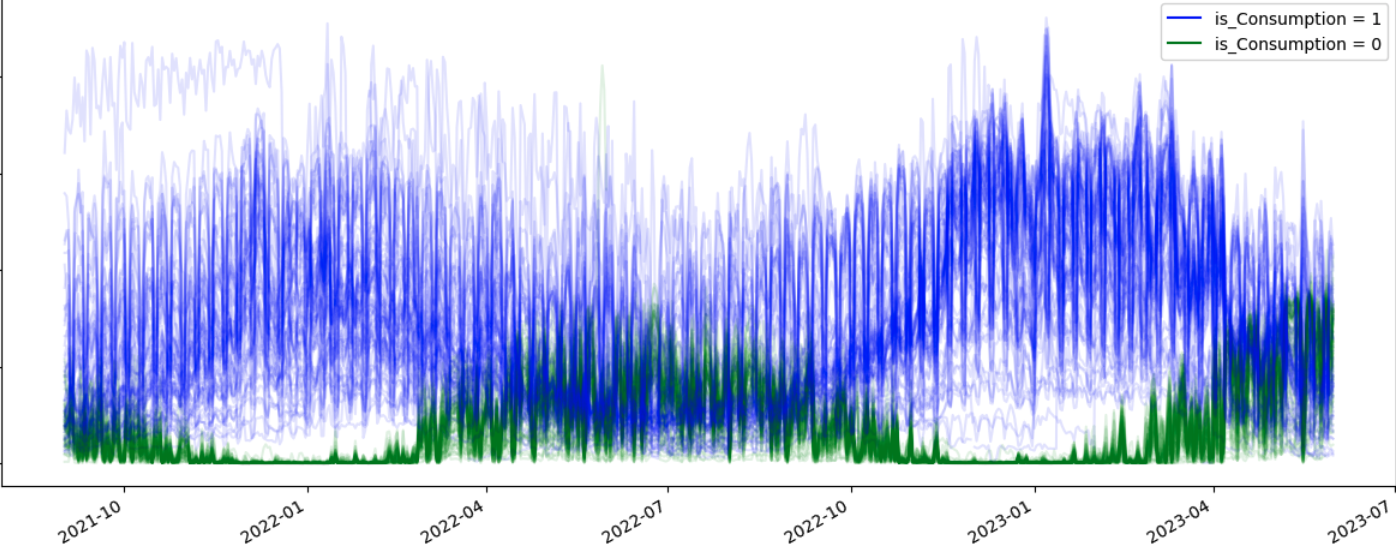

Consumption and production, plotted for each hour
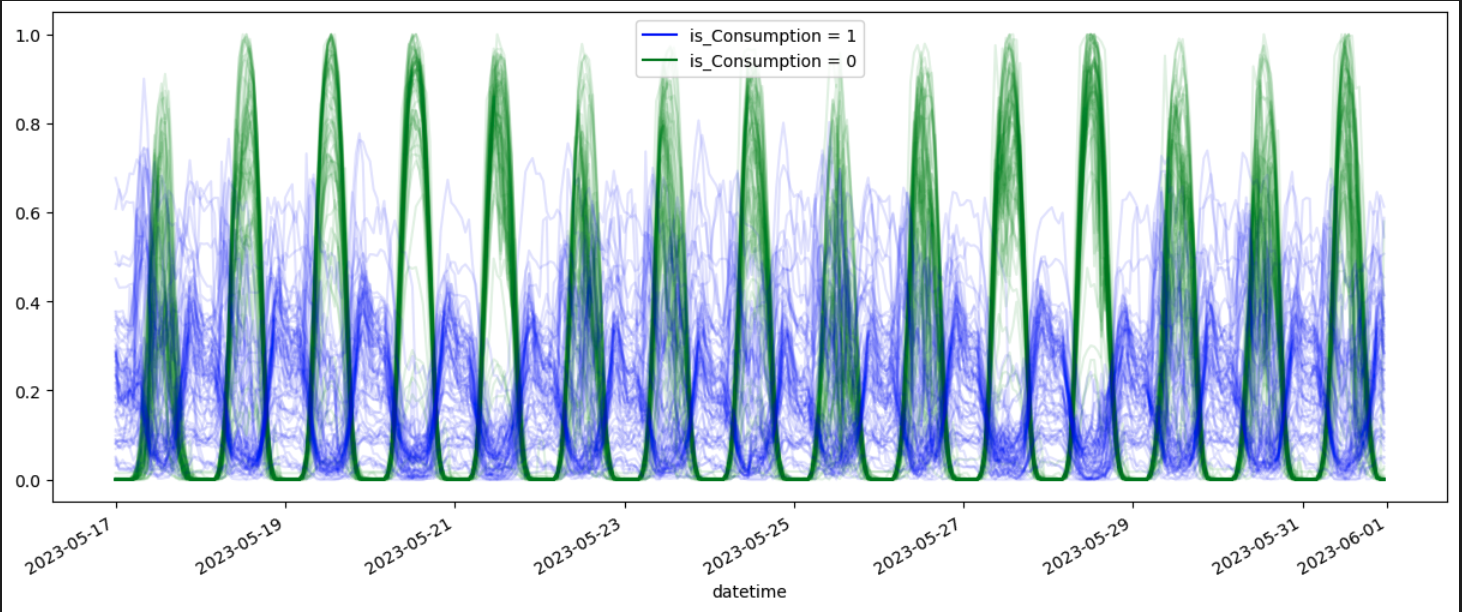


**Challenge 1: Intermittence of Solar Power:** 

As shown in the graph above, solar power production is very much influenced by many factors such as the weather, the hour of the day, the clouds cover, and the season of the year. This leads to an intermittent generation of energy, which as was shown above is not necessarily correlated with the demand. AI can help improve the accuracy of predicting solar power production by using historical weather data, satellite imagery, and providing  accurate weather forecasting. Improving the prediction of solar power production could improve grid management and help integrate of renewable energy sources into it, in an efficient way.

**Challenge 2: Grid Balancing and Stability:** 

As the graph above shows, electricity demand is complicated and flanctuated as well and changes along the different months, weathers, hour of the day, and weekdays, as well as many other features that are not captured in those graphs. This is particularly challenging for the maintanace of a stable grid, as it is necessary to have an accurate prediction of the demand in order to maintain a stable grid that can supply for it. Therefore, the flanctuation of the consupmtion patterns can pose challenges to grid stability, which can have severe consequences as detailed above. AI models can optimize grid operations by predicting peak demand periods and dynamically adjusting electricity generation sources.



**The way towards achieving SDG 7**

On one hand, by enabling accurate prediction of prosumers' patterns, AI models could help pave the way towards clean and affordable energy that is not harming the stability and availability of electricity for all. On the other hand, the huge importance of stable electricity in modern society increases the risks of automating the decisions in those networks. Due to the complexity, high dimentionality and non-linearity of this problem, it seems like AI is the most suitable tool for solving those challenges on the way to achieve the goal, hopefuly with fairness and protection mechanisms to minimize the risks.

## References

1. https://www.annualreviews.org/doi/10.1146/annurev-control-042820-011148
2. https://www.undp.org/sustainable-development-goals/affordable-and-clean-energy?gad_source=1&gclid=CjwKCAiA1fqrBhA1EiwAMU5m_xVrprc0HPWJqOHPSQjLP0gkVj7LR9qtF08pdKcdfQzAkMu7BajriBoC9m4QAvD_BwE
3. https://www.science.org/doi/10.1126/sciadv.abj6734
4. https://www.sciencedirect.com/science/article/abs/pii/B9780128159989000075
5. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7749027/

